## ML project on predicting credit card amount of customers
- Regression problem predict credit amount of customers based on given features train and test files are given
- y=credit_amount dept variable
- x= rest 19 vars

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns",None)

In [3]:
data_train = pd.read_csv("Datasets/credit_amount_Train.csv",index_col=0,header=0,delimiter=' *, *') 
data_test = pd.read_csv("Datasets/credit_amount_Test.csv",index_col=0,header=0,delimiter=' *, *') 

In [4]:
data_train.head()

,account_info,duration_month,credit_history,purpose,credit_amount,savings_account,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
serial number,,,,,,,,,,,,,,,,,,,,
1,<0,6.0,A34,radio/TV,1169,unknown,A75,4,A93,A101,4.0,A121,67.0,A143,A152,2,A173,1,yes,foreigner
2,0-199,48.0,A32,radio/TV,5951,<100,A73,2,A92,A101,2.0,A121,22.0,A143,A152,1,A173,1,no,foreigner
3,unknown,12.0,A34,education,2096,<100,A74,2,A93,A101,3.0,A121,49.0,A143,A152,1,A172,2,no,foreigner
4,<0,42.0,A32,furniture/equipment,7882,<100,A74,2,A93,A103,4.0,A122,45.0,A143,A153,1,A173,2,no,foreigner
5,<0,24.0,A33,new_car,4870,<100,A73,3,A93,A101,4.0,A124,53.0,A143,A153,2,A173,2,no,foreigner


In [5]:
data_train.shape #all vars given with target variable credit amount in train file

(800, 20)

In [6]:
data_test.head()

,account_info,duration_month,credit_history,purpose,savings_account,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
serial number,,,,,,,,,,,,,,,,,,,
1,unknown,24.0,A34,education,<100,A75,4,A93,A101,4.0,A124,54.0,A143,A153,2,A173,2,no,foreigner
2,0-199,18.0,A34,radio/TV,<100,A75,3,A92,A103,4.0,A121,48.0,A141,A151,2,A172,1,yes,foreigner
3,<0,NaN,A34,furniture/equipment,<100,A75,1,A92,A101,4.0,A122,24.0,A143,A152,2,A173,1,no,foreigner
4,unknown,12.0,A34,radio/TV,unknown,A75,4,A93,A101,NaN,A123,35.0,A143,A152,2,A173,1,no,foreigner
5,0-199,12.0,A32,new_car,unknown,A71,1,A92,A101,2.0,A121,24.0,A143,A151,1,A171,1,no,foreigner


In [7]:
data_test.shape #target var credit amount not given in test file

(200, 19)

In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 1 to 800
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   account_info      800 non-null    object 
 1   duration_month    772 non-null    float64
 2   credit_history    800 non-null    object 
 3   purpose           800 non-null    object 
 4   credit_amount     800 non-null    int64  
 5   savings_account   800 non-null    object 
 6   employment_st     800 non-null    object 
 7   poi               800 non-null    int64  
 8   personal_status   800 non-null    object 
 9   gurantors         800 non-null    object 
 10  resident_since    787 non-null    float64
 11  property_type     800 non-null    object 
 12  age               767 non-null    float64
 13  installment_type  800 non-null    object 
 14  housing_type      800 non-null    object 
 15  credits_no        800 non-null    int64  
 16  job_type          800 non-null    object 
 17  li

In [9]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   account_info      200 non-null    object 
 1   duration_month    190 non-null    float64
 2   credit_history    200 non-null    object 
 3   purpose           200 non-null    object 
 4   savings_account   200 non-null    object 
 5   employment_st     200 non-null    object 
 6   poi               200 non-null    int64  
 7   personal_status   200 non-null    object 
 8   gurantors         200 non-null    object 
 9   resident_since    194 non-null    float64
 10  property_type     200 non-null    object 
 11  age               194 non-null    float64
 12  installment_type  200 non-null    object 
 13  housing_type      200 non-null    object 
 14  credits_no        200 non-null    int64  
 15  job_type          200 non-null    object 
 16  liables           200 non-null    int64  
 17  te

In [10]:
data_train.describe()

,duration_month,credit_amount,poi,resident_since,age,credits_no,liables
count,772.000000,800.000000,800.000000,787.000000,767.000000,800.000000,800.000000
mean,20.645078,3190.976250,2.966250,2.822109,35.423729,1.396250,1.147500
std,12.374860,2732.671789,1.128806,1.105788,11.714471,0.569773,0.354825
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1342.250000,2.000000,2.000000,26.000000,1.000000,1.000000
50%,18.000000,2281.500000,3.000000,3.000000,32.000000,1.000000,1.000000
75%,24.000000,3914.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,15945.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [11]:
data_train.describe(include='all')

,account_info,duration_month,credit_history,purpose,credit_amount,savings_account,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
count,800,772.000000,800,800,800.000000,800,800,800.000000,800,800,787.000000,800,767.000000,800,800,800.000000,800,800.000000,800,800
unique,5,NaN,5,10,NaN,5,5,NaN,4,4,NaN,4,NaN,3,3,NaN,4,NaN,3,3
top,unknown,NaN,A32,radio/TV,NaN,<100,A73,NaN,A93,A101,NaN,A123,NaN,A143,A152,NaN,A173,NaN,no,foreigner
freq,296,NaN,424,223,NaN,476,275,NaN,437,704,NaN,266,NaN,653,570,NaN,503,NaN,458,745
mean,NaN,20.645078,NaN,NaN,3190.976250,NaN,NaN,2.966250,NaN,NaN,2.822109,NaN,35.423729,NaN,NaN,1.396250,NaN,1.147500,NaN,NaN
std,NaN,12.374860,NaN,NaN,2732.671789,NaN,NaN,1.128806,NaN,NaN,1.105788,NaN,11.714471,NaN,NaN,0.569773,NaN,0.354825,NaN,NaN
min,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
25%,NaN,12.000000,NaN,NaN,1342.250000,NaN,NaN,2.000000,NaN,NaN,2.000000,NaN,26.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
50%,NaN,18.000000,NaN,NaN,2281.500000,NaN,NaN,3.000000,NaN,NaN,3.000000,NaN,32.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
75%,NaN,24.000000,NaN,NaN,3914.250000,NaN,NaN,4.000000,NaN,NaN,4.000000,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN


In [12]:
data_test.describe()

,duration_month,poi,resident_since,age,credits_no,liables
count,190.000000,200.000000,194.000000,194.000000,200.000000,200.000000
mean,21.973684,3.000000,2.824742,36.108247,1.450000,1.185000
std,11.935645,1.079736,1.091752,11.167757,0.607739,0.389272
min,4.000000,1.000000,1.000000,20.000000,1.000000,1.000000
25%,12.000000,2.000000,2.000000,28.000000,1.000000,1.000000
50%,18.000000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,29.500000,4.000000,4.000000,43.000000,2.000000,1.000000
max,60.000000,4.000000,4.000000,68.000000,4.000000,2.000000


In [13]:
data_train.isnull().sum()

account_info         0
duration_month      28
credit_history       0
purpose              0
credit_amount        0
savings_account      0
employment_st        0
poi                  0
personal_status      0
gurantors            0
resident_since      13
property_type        0
age                 33
installment_type     0
housing_type         0
credits_no           0
job_type             0
liables              0
telephone            0
foreigner            0
dtype: int64

In [14]:
data_test.isnull().sum()

account_info         0
duration_month      10
credit_history       0
purpose              0
savings_account      0
employment_st        0
poi                  0
personal_status      0
gurantors            0
resident_since       6
property_type        0
age                  6
installment_type     0
housing_type         0
credits_no           0
job_type             0
liables              0
telephone            0
foreigner            0
dtype: int64

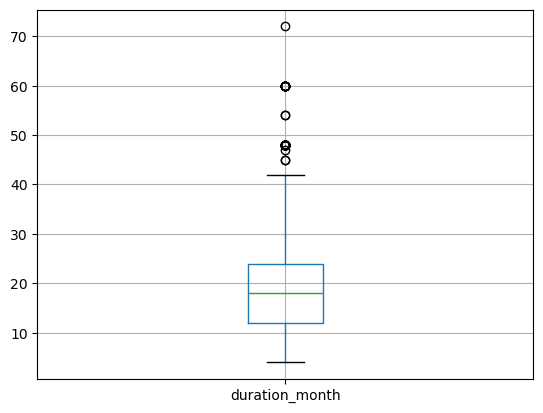

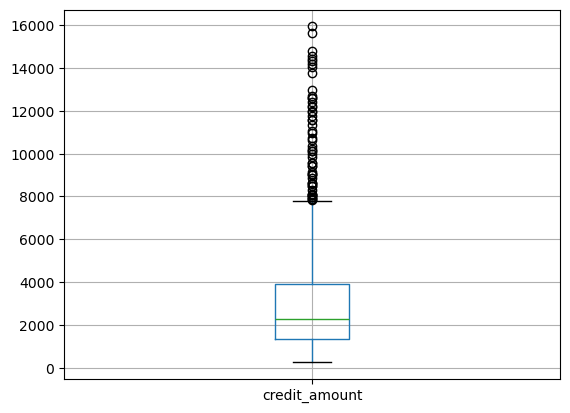

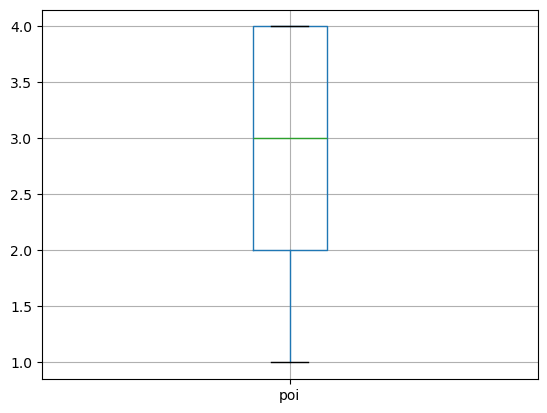

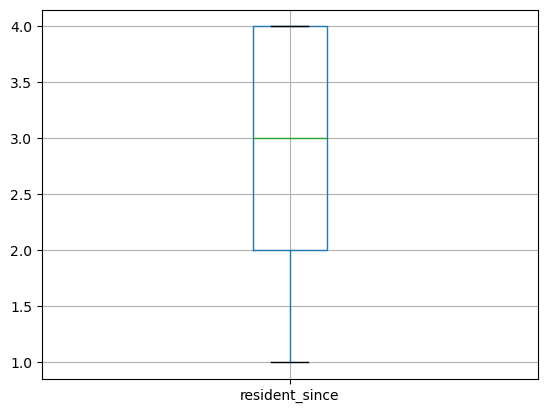

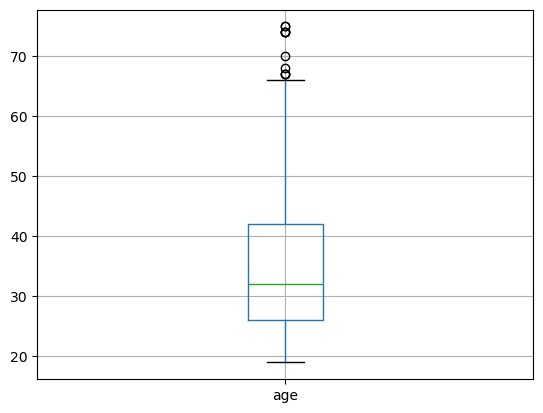

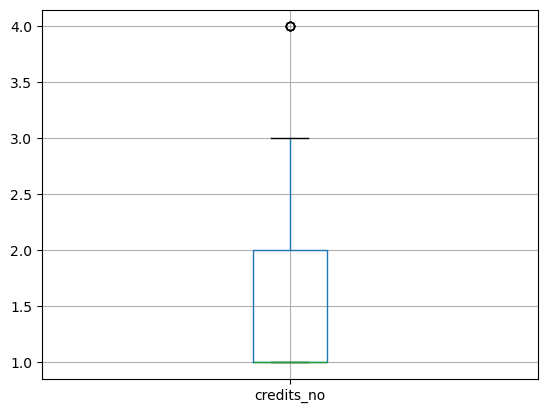

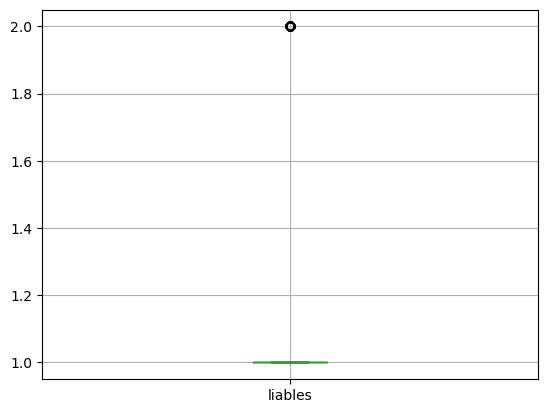

In [15]:
for i in data_train.columns:
    if data_train[i].dtype != 'object':
        data_train.boxplot(column=i) #1 plot at a time
        plt.show()

In [16]:
data_train[data_train.duration_month.isnull()]

,account_info,duration_month,credit_history,purpose,credit_amount,savings_account,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
serial number,,,,,,,,,,,,,,,,,,,,
100,0-199,NaN,A33,old_car,7057,unknown,A74,3,A93,A101,4.0,A122,36.0,A141,A151,2,A174,2,yes,foreigner
121,<0,NaN,A32,radio/TV,1835,<100,A73,3,A92,A101,2.0,A121,25.0,A143,A152,2,A173,1,yes,foreigner
145,unknown,NaN,A34,furniture/equipment,2288,<100,A72,4,A92,A101,4.0,A122,23.0,A143,A152,1,A173,1,yes,foreigner
175,<0,NaN,A33,education,3414,<100,A72,2,A93,A101,1.0,A122,26.0,A143,A152,2,A173,1,no,foreigner
180,<0,NaN,A34,new_car,571,<100,A75,4,A93,A101,4.0,A121,65.0,A143,A152,2,A173,1,no,foreigner
183,<0,NaN,A31,new_car,1647,unknown,A73,4,A93,A101,2.0,A122,40.0,A143,A152,2,A172,2,no,foreigner
238,0-199,NaN,A32,business,2767,100-499,A75,4,A91,A101,2.0,A123,61.0,A141,A151,2,A172,1,no,foreigner
300,0-199,NaN,A34,furniture/equipment,2745,>=1000,A74,3,A93,A101,2.0,A123,32.0,A143,A152,2,A173,1,yes,foreigner
342,<0,NaN,A32,furniture/equipment,3599,<100,A74,1,A92,A101,4.0,A123,26.0,A143,A151,1,A172,1,no,foreigner


In [17]:
#As this is practice set I cannot speak to client lets replace the nan values with mean/median

In [18]:
data_train.duration_month.mean()

20.645077720207254

In [19]:
data_train.duration_month.median()

18.0

In [20]:
#data_train.duration_month[data_train.duration_month.isnull()]=data_train.duration_month.median

In [21]:
data_train.duration_month.replace(np.nan,data_train.duration_month.median(),inplace=True)

In [22]:
data_train.duration_month.isnull().sum()

0

In [23]:
data_train.duration_month.dtype

dtype('float64')

In [24]:
data_train.resident_since.mean()

2.8221092757306225

In [25]:
data_train.resident_since.mode()[0]

4.0

In [26]:
#round(data_train.resident_since.mean(),1)

In [27]:
data_train.resident_since.replace(np.nan,data_train.resident_since.mode()[0],inplace=True)

In [28]:
data_train.age.median()

32.0

In [29]:
data_train.age.replace(np.nan,data_train.age.median(),inplace=True)

In [30]:
data_train.age.dtype

dtype('float64')

In [31]:
data_train.isnull().sum()

account_info        0
duration_month      0
credit_history      0
purpose             0
credit_amount       0
savings_account     0
employment_st       0
poi                 0
personal_status     0
gurantors           0
resident_since      0
property_type       0
age                 0
installment_type    0
housing_type        0
credits_no          0
job_type            0
liables             0
telephone           0
foreigner           0
dtype: int64

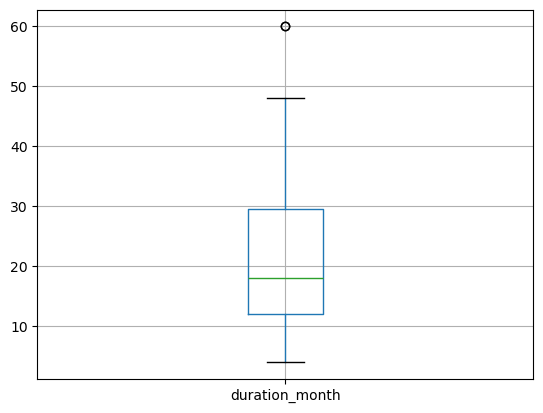

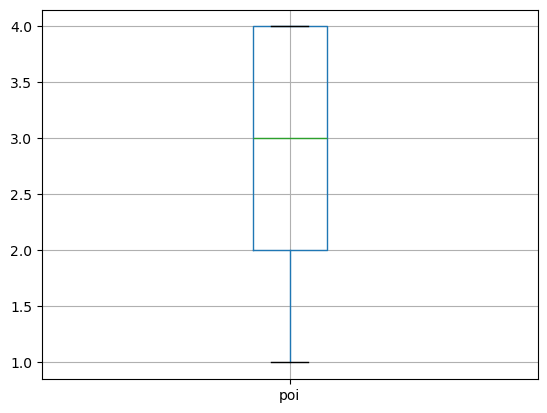

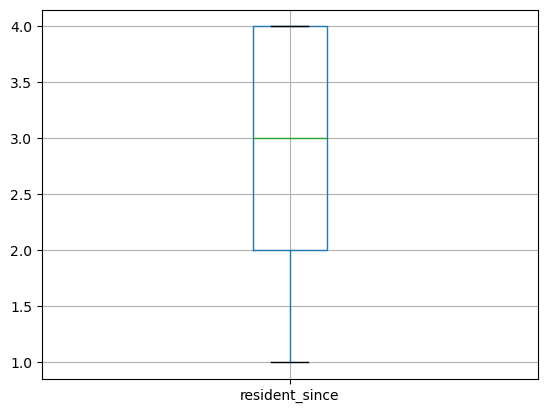

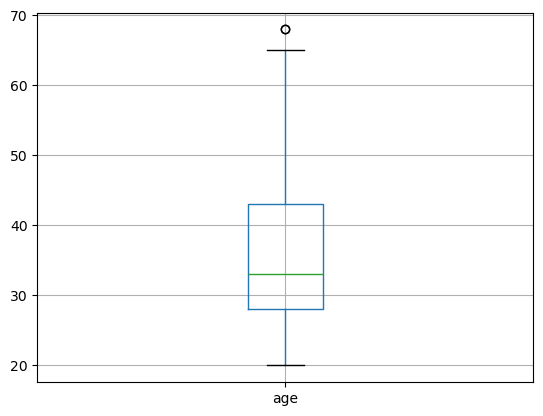

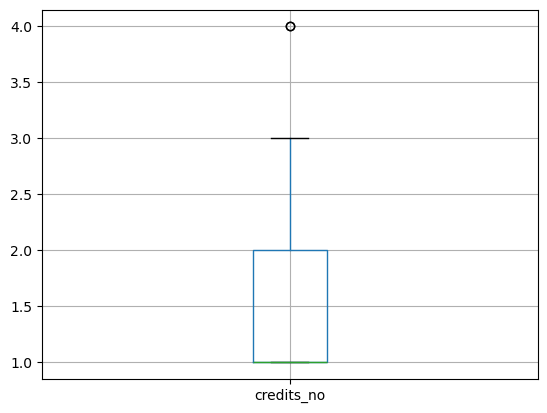

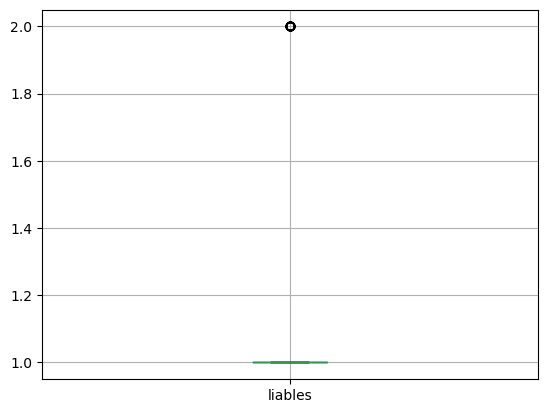

In [32]:
for i in data_test.columns:
    if data_test[i].dtype != 'object':
        data_test.boxplot(column=i) #1 plot at a time
        plt.show()

In [33]:
data_test.duration_month.median()

18.0

In [34]:
data_test.duration_month.replace(np.nan,data_test.duration_month.median(),inplace=True)

In [35]:
data_test.resident_since.mode()[0]

4.0

In [36]:
data_test.resident_since.replace(np.nan,data_test.resident_since.mode()[0],inplace=True)

In [37]:
data_test.age.median()

33.0

In [38]:
data_test.age.mean()

36.108247422680414

In [39]:
data_test.age.replace(np.nan,32.0,inplace=True)

In [40]:
data_test.isnull().sum()

account_info        0
duration_month      0
credit_history      0
purpose             0
savings_account     0
employment_st       0
poi                 0
personal_status     0
gurantors           0
resident_since      0
property_type       0
age                 0
installment_type    0
housing_type        0
credits_no          0
job_type            0
liables             0
telephone           0
foreigner           0
dtype: int64

In [41]:
data_train.duplicated().sum()

0

In [42]:
data_test.duplicated().sum()

0

In [43]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 1 to 800
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   account_info      800 non-null    object 
 1   duration_month    800 non-null    float64
 2   credit_history    800 non-null    object 
 3   purpose           800 non-null    object 
 4   credit_amount     800 non-null    int64  
 5   savings_account   800 non-null    object 
 6   employment_st     800 non-null    object 
 7   poi               800 non-null    int64  
 8   personal_status   800 non-null    object 
 9   gurantors         800 non-null    object 
 10  resident_since    800 non-null    float64
 11  property_type     800 non-null    object 
 12  age               800 non-null    float64
 13  installment_type  800 non-null    object 
 14  housing_type      800 non-null    object 
 15  credits_no        800 non-null    int64  
 16  job_type          800 non-null    object 
 17  li

In [44]:
for i in data_train.columns:
    if data_train[i].dtype == 'object':
        print({i:data_train[i].unique()})

{'account_info': array(['<0', '0-199', 'unknown', '?', '>=200'], dtype=object)}
{'credit_history': array(['A34', 'A32', 'A33', 'A30', 'A31'], dtype=object)}
{'purpose': array(['radio/TV', 'education', 'furniture/equipment', 'new_car',
       'old_car', 'business', 'domestic_appliances', 'repairing', 'other',
       'upskilling'], dtype=object)}
{'savings_account': array(['unknown', '<100', '500-999', '>=1000', '100-499'], dtype=object)}
{'employment_st': array(['A75', 'A73', 'A74', 'A71', 'A72'], dtype=object)}
{'personal_status': array(['A93', 'A92', 'A91', 'A94'], dtype=object)}
{'gurantors': array(['A101', 'A103', '?', 'A102'], dtype=object)}
{'property_type': array(['A121', 'A122', 'A124', 'A123'], dtype=object)}
{'installment_type': array(['A143', 'A141', 'A142'], dtype=object)}
{'housing_type': array(['A152', 'A153', 'A151'], dtype=object)}
{'job_type': array(['A173', 'A172', 'A174', 'A171'], dtype=object)}
{'telephone': array(['yes', 'no', '?'], dtype=object)}
{'foreigner': arra

In [45]:
data_train[data_train.account_info=='?']

,account_info,duration_month,credit_history,purpose,credit_amount,savings_account,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
serial number,,,,,,,,,,,,,,,,,,,,
25,?,10.0,A34,furniture/equipment,2069,unknown,A73,2,A94,A101,1.0,A123,26.0,A143,A152,2,A173,1,no,resident
69,?,36.0,A32,education,1819,<100,A73,4,A93,A101,4.0,A124,37.0,A142,A153,1,A173,1,yes,foreigner
82,?,15.0,A32,radio/TV,1213,500-999,A75,4,A93,?,3.0,A122,47.0,A142,A152,1,A173,1,yes,foreigner
107,?,18.0,A31,new_car,6458,<100,A75,2,A93,A101,4.0,A124,39.0,A141,A152,2,A174,2,yes,foreigner
151,?,6.0,A32,radio/TV,1346,100-499,A75,2,A93,A101,4.0,A124,42.0,A141,A153,1,A173,2,yes,foreigner
229,?,9.0,A32,radio/TV,1478,<100,A74,4,A93,A101,2.0,A123,22.0,A143,A152,1,A173,1,no,foreigner
270,?,24.0,A32,radio/TV,999,unknown,A75,4,A93,A101,2.0,A123,25.0,A143,A152,2,A173,1,no,foreigner
349,?,6.0,A33,business,1743,100-499,A73,1,A93,A101,2.0,A121,34.0,A143,A152,2,A172,1,?,foreigner
431,?,5.0,A32,business,3448,<100,A74,1,A93,A101,4.0,A121,74.0,A143,A152,1,A172,1,no,foreigner


In [46]:
data_train.account_info[data_train.account_info=='?'].count()

14

In [47]:
data_train.gurantors[data_train.gurantors=='?'].count()

24

In [48]:
data_train.telephone[data_train.telephone=='?'].count()

23

In [49]:
data_train.foreigner[data_train.foreigner=='?'].count()

28

In [50]:
data_train.account_info[data_train.account_info=='?']='unknown'

In [51]:
data_train.gurantors[data_train.gurantors=='?']='unknown'

In [52]:
data_train.telephone[data_train.telephone=='?']='unknown'

In [53]:
data_train.foreigner[data_train.foreigner=='?']='unknown'

In [54]:
for i in data_train.columns:
    if data_train[i].dtype == 'object':
        print({i:data_train[i].unique()})

{'account_info': array(['<0', '0-199', 'unknown', '>=200'], dtype=object)}
{'credit_history': array(['A34', 'A32', 'A33', 'A30', 'A31'], dtype=object)}
{'purpose': array(['radio/TV', 'education', 'furniture/equipment', 'new_car',
       'old_car', 'business', 'domestic_appliances', 'repairing', 'other',
       'upskilling'], dtype=object)}
{'savings_account': array(['unknown', '<100', '500-999', '>=1000', '100-499'], dtype=object)}
{'employment_st': array(['A75', 'A73', 'A74', 'A71', 'A72'], dtype=object)}
{'personal_status': array(['A93', 'A92', 'A91', 'A94'], dtype=object)}
{'gurantors': array(['A101', 'A103', 'unknown', 'A102'], dtype=object)}
{'property_type': array(['A121', 'A122', 'A124', 'A123'], dtype=object)}
{'installment_type': array(['A143', 'A141', 'A142'], dtype=object)}
{'housing_type': array(['A152', 'A153', 'A151'], dtype=object)}
{'job_type': array(['A173', 'A172', 'A174', 'A171'], dtype=object)}
{'telephone': array(['yes', 'no', 'unknown'], dtype=object)}
{'foreigner

In [55]:
for i in data_test.columns:
    if data_test[i].dtype == 'object':
        print({i:data_test[i].unique()})

{'account_info': array(['unknown', '0-199', '<0', '>=200', '?'], dtype=object)}
{'credit_history': array(['A34', 'A32', 'A31', 'A30', 'A33'], dtype=object)}
{'purpose': array(['education', 'radio/TV', 'furniture/equipment', 'new_car',
       'old_car', 'business', 'domestic_appliances', 'other', 'repairing',
       'upskilling'], dtype=object)}
{'savings_account': array(['<100', 'unknown', '500-999', '100-499', '>=1000'], dtype=object)}
{'employment_st': array(['A75', 'A71', 'A74', 'A72', 'A73'], dtype=object)}
{'personal_status': array(['A93', 'A92', 'A94', 'A91'], dtype=object)}
{'gurantors': array(['A101', 'A103', '?', 'A102'], dtype=object)}
{'property_type': array(['A124', 'A121', 'A122', 'A123'], dtype=object)}
{'installment_type': array(['A143', 'A141', 'A142'], dtype=object)}
{'housing_type': array(['A153', 'A151', 'A152'], dtype=object)}
{'job_type': array(['A173', 'A172', 'A171', 'A174'], dtype=object)}
{'telephone': array(['no', 'yes'], dtype=object)}
{'foreigner': array(['f

In [56]:
data_test.account_info[data_test.account_info=='?']='unknown'
data_test.gurantors[data_test.gurantors=='?']='unknown'
data_test.foreigner[data_test.foreigner=='?']='unknown'

In [57]:
for i in data_test.columns:
    if data_test[i].dtype == 'object':
        print({i:data_test[i].unique()})

{'account_info': array(['unknown', '0-199', '<0', '>=200'], dtype=object)}
{'credit_history': array(['A34', 'A32', 'A31', 'A30', 'A33'], dtype=object)}
{'purpose': array(['education', 'radio/TV', 'furniture/equipment', 'new_car',
       'old_car', 'business', 'domestic_appliances', 'other', 'repairing',
       'upskilling'], dtype=object)}
{'savings_account': array(['<100', 'unknown', '500-999', '100-499', '>=1000'], dtype=object)}
{'employment_st': array(['A75', 'A71', 'A74', 'A72', 'A73'], dtype=object)}
{'personal_status': array(['A93', 'A92', 'A94', 'A91'], dtype=object)}
{'gurantors': array(['A101', 'A103', 'unknown', 'A102'], dtype=object)}
{'property_type': array(['A124', 'A121', 'A122', 'A123'], dtype=object)}
{'installment_type': array(['A143', 'A141', 'A142'], dtype=object)}
{'housing_type': array(['A153', 'A151', 'A152'], dtype=object)}
{'job_type': array(['A173', 'A172', 'A171', 'A174'], dtype=object)}
{'telephone': array(['no', 'yes'], dtype=object)}
{'foreigner': array(['

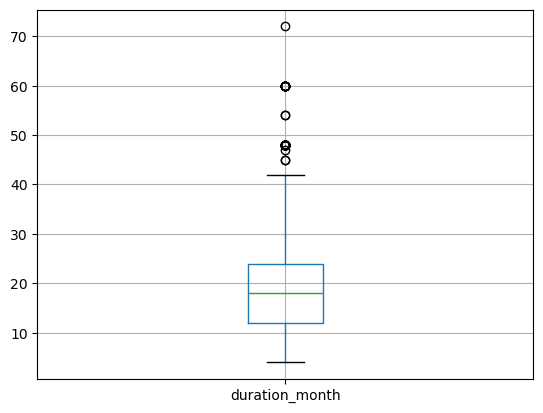

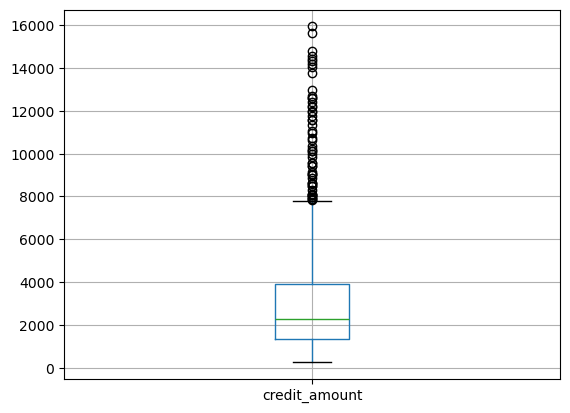

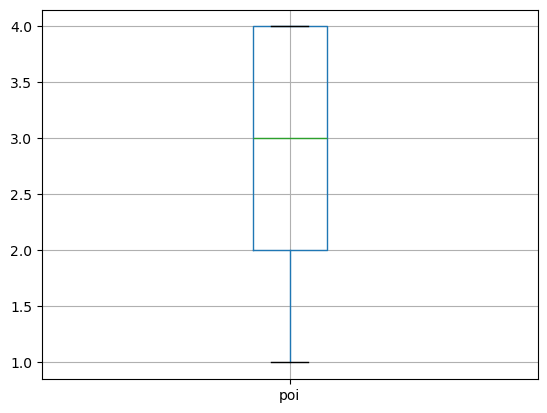

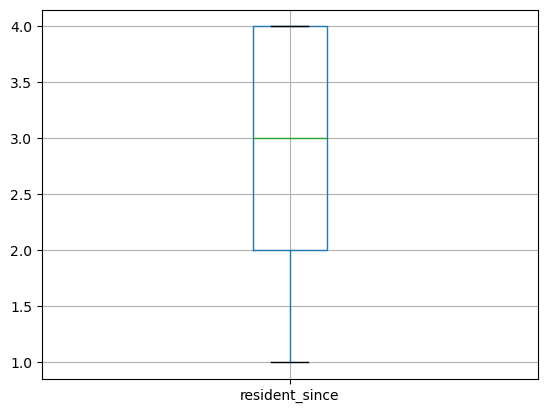

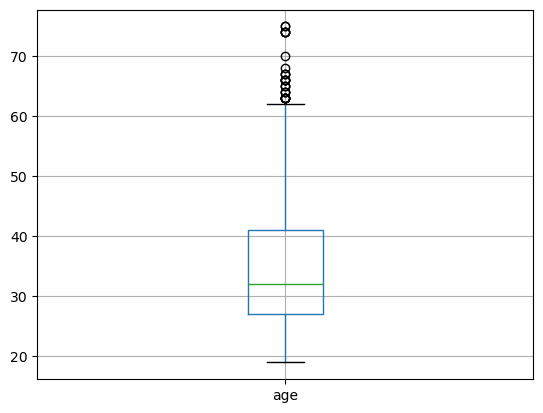

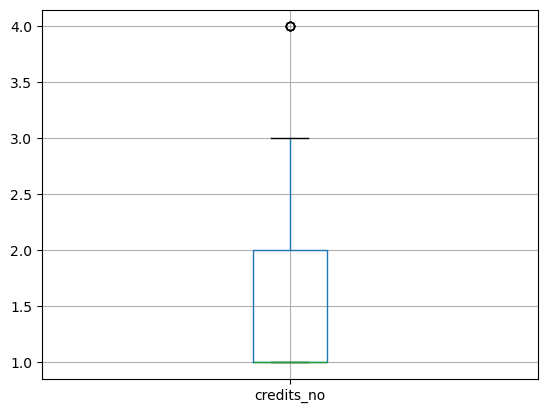

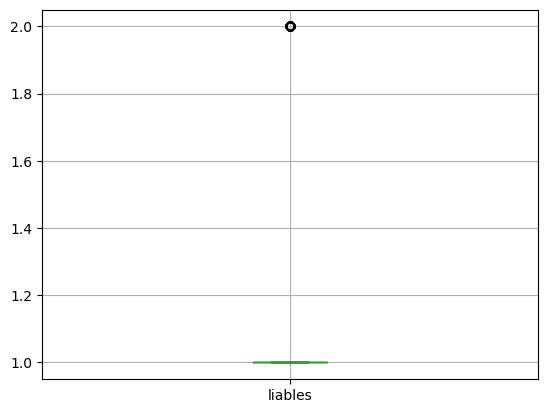

In [58]:
#check outliers
#Assumption: Linear regression must have no outliers
for i in data_train.columns:
    if data_train[i].dtype != 'object':
        data_train.boxplot(column=i) #1 plot at a time
        plt.show()

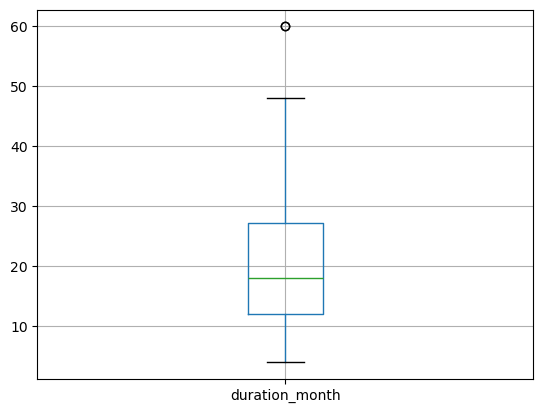

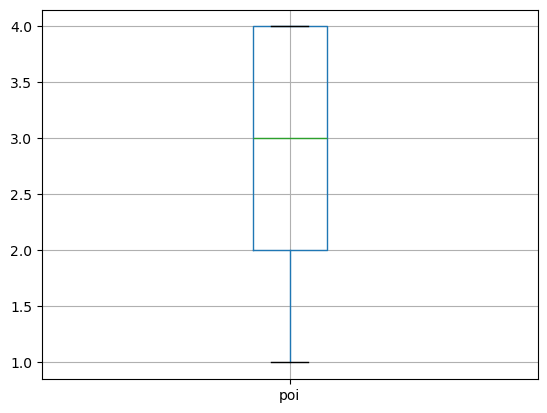

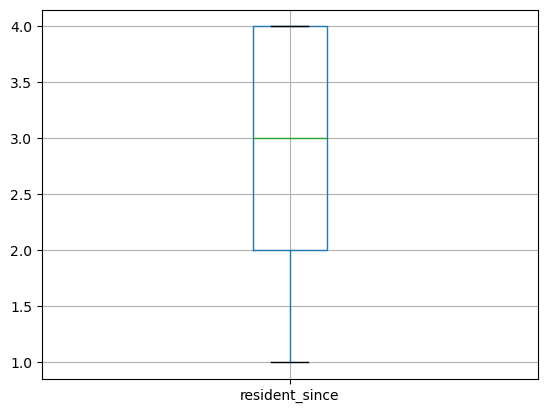

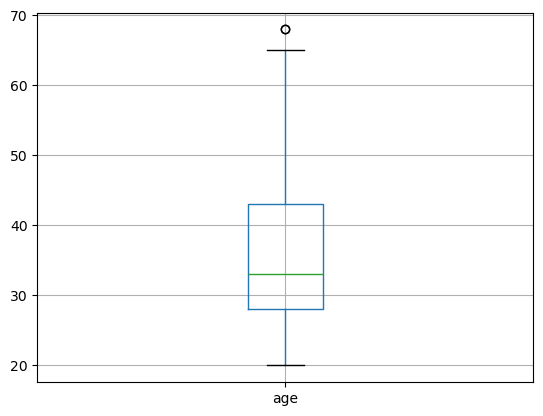

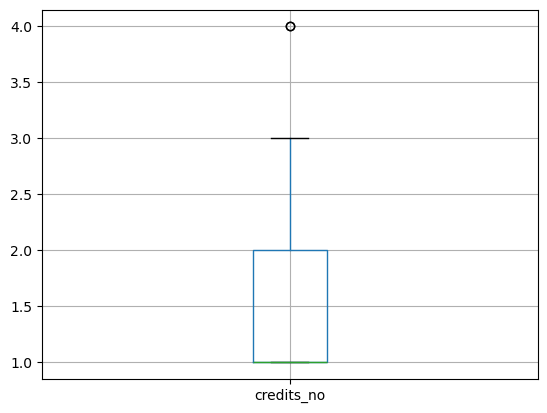

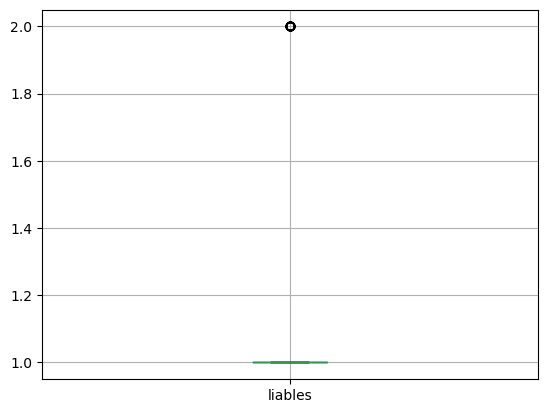

In [59]:
#check outliers
#Assumption: Linear regression must have no outliers
for i in data_test.columns:
    if data_test[i].dtype != 'object':
        data_test.boxplot(column=i) #1 plot at a time
        plt.show()

In [60]:
#there are no true outliers in train and test data

In [61]:
colname=[]
for i in data_train.columns:
    if data_train[i].dtype == 'object':
        colname.append(i)

colname

['account_info',
 'credit_history',
 'purpose',
 'savings_account',
 'employment_st',
 'personal_status',
 'gurantors',
 'property_type',
 'installment_type',
 'housing_type',
 'job_type',
 'telephone',
 'foreigner']

In [62]:
# For preprocessing the data
from sklearn.preprocessing import LabelEncoder
 
le=LabelEncoder()
 
for x in colname:
    data_train[x]=le.fit_transform(data_train[x]) #mandatory
    

    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_))) #optional check labels
    print('Feature', x)
    print('mapping', le_name_mapping)

Feature account_info
mapping {'0-199': 0, '<0': 1, '>=200': 2, 'unknown': 3}
Feature credit_history
mapping {'A30': 0, 'A31': 1, 'A32': 2, 'A33': 3, 'A34': 4}
Feature purpose
mapping {'business': 0, 'domestic_appliances': 1, 'education': 2, 'furniture/equipment': 3, 'new_car': 4, 'old_car': 5, 'other': 6, 'radio/TV': 7, 'repairing': 8, 'upskilling': 9}
Feature savings_account
mapping {'100-499': 0, '500-999': 1, '<100': 2, '>=1000': 3, 'unknown': 4}
Feature employment_st
mapping {'A71': 0, 'A72': 1, 'A73': 2, 'A74': 3, 'A75': 4}
Feature personal_status
mapping {'A91': 0, 'A92': 1, 'A93': 2, 'A94': 3}
Feature gurantors
mapping {'A101': 0, 'A102': 1, 'A103': 2, 'unknown': 3}
Feature property_type
mapping {'A121': 0, 'A122': 1, 'A123': 2, 'A124': 3}
Feature installment_type
mapping {'A141': 0, 'A142': 1, 'A143': 2}
Feature housing_type
mapping {'A151': 0, 'A152': 1, 'A153': 2}
Feature job_type
mapping {'A171': 0, 'A172': 1, 'A173': 2, 'A174': 3}
Feature telephone
mapping {'no': 0, 'unknow

In [63]:
colname1=[]
for i in data_test.columns:
    if data_test[i].dtype == 'object':
        colname1.append(i)

colname1

['account_info',
 'credit_history',
 'purpose',
 'savings_account',
 'employment_st',
 'personal_status',
 'gurantors',
 'property_type',
 'installment_type',
 'housing_type',
 'job_type',
 'telephone',
 'foreigner']

In [64]:
# For preprocessing the data
from sklearn.preprocessing import LabelEncoder
 
le1=LabelEncoder()
 
for x in colname1:
    data_test[x]=le1.fit_transform(data_test[x]) #mandatory
    

    le_name_mapping = dict(zip(le1.classes_, le1.transform(le1.classes_))) #optional check labels
    print('Feature', x)
    print('mapping', le_name_mapping)

Feature account_info
mapping {'0-199': 0, '<0': 1, '>=200': 2, 'unknown': 3}
Feature credit_history
mapping {'A30': 0, 'A31': 1, 'A32': 2, 'A33': 3, 'A34': 4}
Feature purpose
mapping {'business': 0, 'domestic_appliances': 1, 'education': 2, 'furniture/equipment': 3, 'new_car': 4, 'old_car': 5, 'other': 6, 'radio/TV': 7, 'repairing': 8, 'upskilling': 9}
Feature savings_account
mapping {'100-499': 0, '500-999': 1, '<100': 2, '>=1000': 3, 'unknown': 4}
Feature employment_st
mapping {'A71': 0, 'A72': 1, 'A73': 2, 'A74': 3, 'A75': 4}
Feature personal_status
mapping {'A91': 0, 'A92': 1, 'A93': 2, 'A94': 3}
Feature gurantors
mapping {'A101': 0, 'A102': 1, 'A103': 2, 'unknown': 3}
Feature property_type
mapping {'A121': 0, 'A122': 1, 'A123': 2, 'A124': 3}
Feature installment_type
mapping {'A141': 0, 'A142': 1, 'A143': 2}
Feature housing_type
mapping {'A151': 0, 'A152': 1, 'A153': 2}
Feature job_type
mapping {'A171': 0, 'A172': 1, 'A173': 2, 'A174': 3}
Feature telephone
mapping {'no': 0, 'yes': 

In [65]:
data_train.head()

,account_info,duration_month,credit_history,purpose,credit_amount,savings_account,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
serial number,,,,,,,,,,,,,,,,,,,,
1,1,6.0,4,7,1169,4,4,4,2,0,4.0,0,67.0,2,1,2,2,1,2,0
2,0,48.0,2,7,5951,2,2,2,1,0,2.0,0,22.0,2,1,1,2,1,0,0
3,3,12.0,4,2,2096,2,3,2,2,0,3.0,0,49.0,2,1,1,1,2,0,0
4,1,42.0,2,3,7882,2,3,2,2,2,4.0,1,45.0,2,2,1,2,2,0,0
5,1,24.0,3,4,4870,2,2,3,2,0,4.0,3,53.0,2,2,2,2,2,0,0


In [66]:
data_test.head()

,account_info,duration_month,credit_history,purpose,savings_account,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
serial number,,,,,,,,,,,,,,,,,,,
1,3,24.0,4,2,2,4,4,2,0,4.0,3,54.0,2,2,2,2,2,0,0
2,0,18.0,4,7,2,4,3,1,2,4.0,0,48.0,0,0,2,1,1,1,0
3,1,18.0,4,3,2,4,1,1,0,4.0,1,24.0,2,1,2,2,1,0,0
4,3,12.0,4,7,4,4,4,2,0,4.0,2,35.0,2,1,2,2,1,0,0
5,0,12.0,2,4,4,0,1,1,0,2.0,0,24.0,2,0,1,0,1,0,0


In [67]:
data_train.columns

Index(['account_info', 'duration_month', 'credit_history', 'purpose',
       'credit_amount', 'savings_account', 'employment_st', 'poi',
       'personal_status', 'gurantors', 'resident_since', 'property_type',
       'age', 'installment_type', 'housing_type', 'credits_no', 'job_type',
       'liables', 'telephone', 'foreigner'],
      dtype='object')

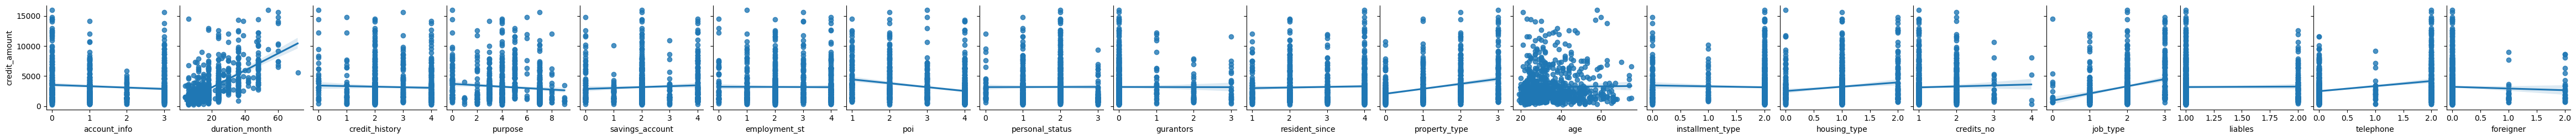

In [68]:
#Assumption 2: Linearity: every ind var should have a linear relationship with dept var

sns.pairplot(data_train,x_vars=['account_info', 'duration_month', 'credit_history', 'purpose',
      'savings_account', 'employment_st', 'poi',
       'personal_status', 'gurantors', 'resident_since', 'property_type',
       'age', 'installment_type', 'housing_type', 'credits_no', 'job_type',
       'liables', 'telephone', 'foreigner'],y_vars=['credit_amount'],kind='reg')
plt.show()

In [69]:
#Conclusion:Duration month has positive linear relationship with credit amount
#All other variables do not show linear relationship with credit amount

In [70]:
X=data_train.drop(['credit_amount','gurantors','housing_type','liables','telephone','foreigner'],axis=1)
Y=data_train.credit_amount

In [71]:
X.shape

(800, 14)

In [72]:
Y.shape

(800,)

In [73]:
X

,account_info,duration_month,credit_history,purpose,savings_account,employment_st,poi,personal_status,resident_since,property_type,age,installment_type,credits_no,job_type
serial number,,,,,,,,,,,,,,
1,1,6.0,4,7,4,4,4,2,4.0,0,67.0,2,2,2
2,0,48.0,2,7,2,2,2,1,2.0,0,22.0,2,1,2
3,3,12.0,4,2,2,3,2,2,3.0,0,49.0,2,1,1
4,1,42.0,2,3,2,3,2,2,4.0,1,45.0,2,1,2
5,1,24.0,3,4,2,2,3,2,4.0,3,53.0,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,3,9.0,2,3,0,1,2,1,4.0,1,22.0,2,1,2
797,1,18.0,2,5,4,4,1,2,4.0,1,51.0,2,1,2
798,3,12.0,4,3,2,1,2,1,4.0,1,22.0,2,2,1


In [74]:
X_testing_new=data_test.drop(['gurantors','housing_type','liables','telephone','foreigner'],axis=1)

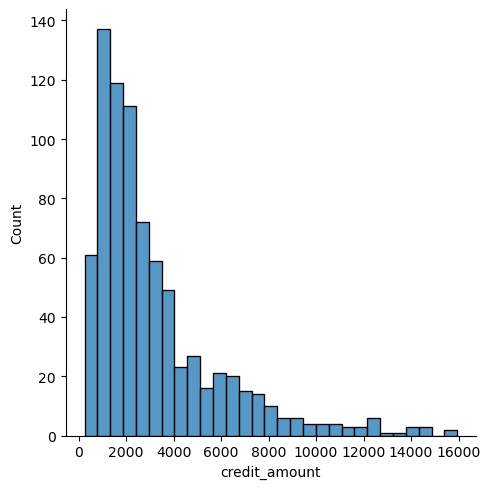

In [75]:
#assumption of normality: the dept var should follow an normal dist
sns.displot(Y)
plt.show()
#sns.displot?

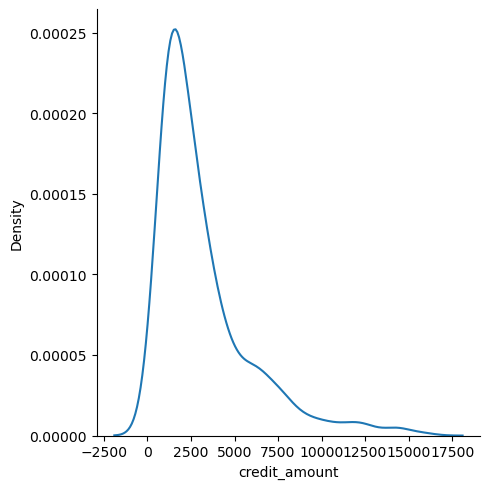

In [76]:
sns.displot(Y,kind='kde')
plt.show();

In [77]:
#Y does not follow a normal distribution it is right skewed

In [78]:
#lets do log transformation to reduce skewness
Y_log= np.log1p(Y)

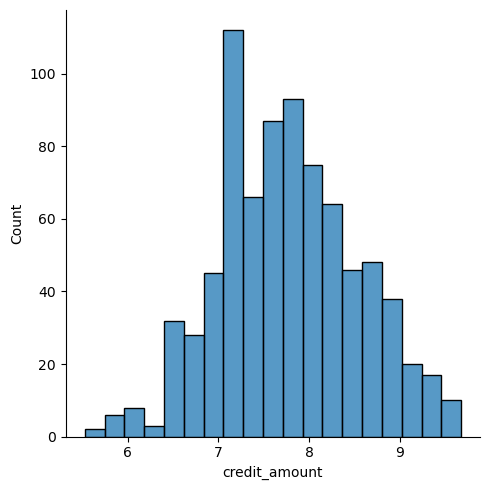

In [79]:
sns.displot(Y_log)
plt.show()

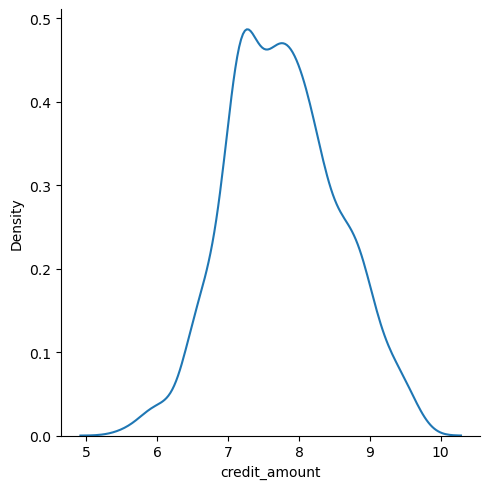

In [80]:
sns.displot(Y_log,kind='kde')
plt.show()
#Y credit amount follows close to normal distribution after log transform

histogram for account_info


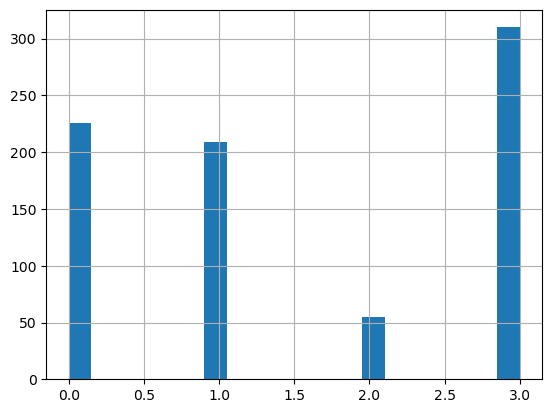

histogram for duration_month


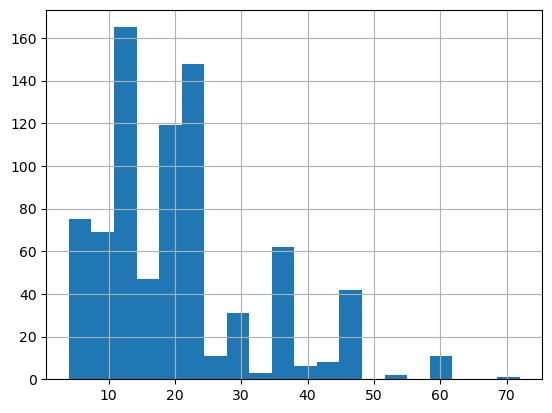

histogram for credit_history


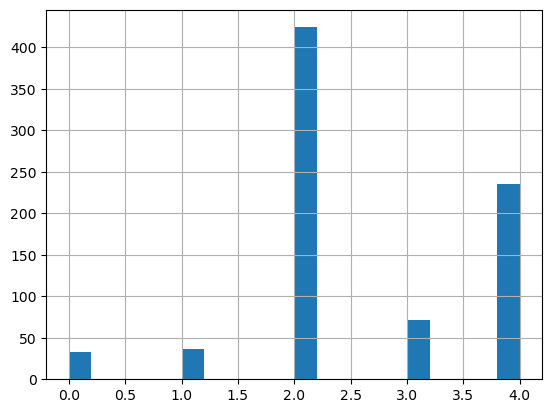

histogram for purpose


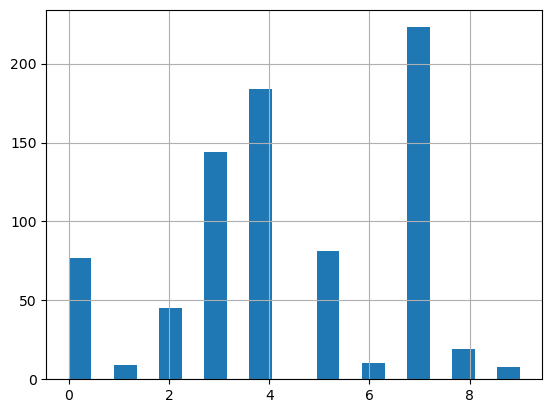

histogram for savings_account


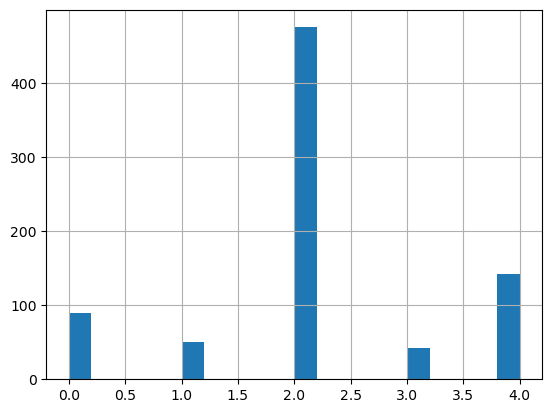

histogram for employment_st


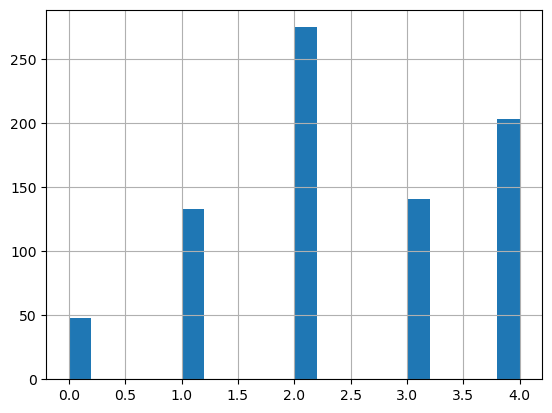

histogram for poi


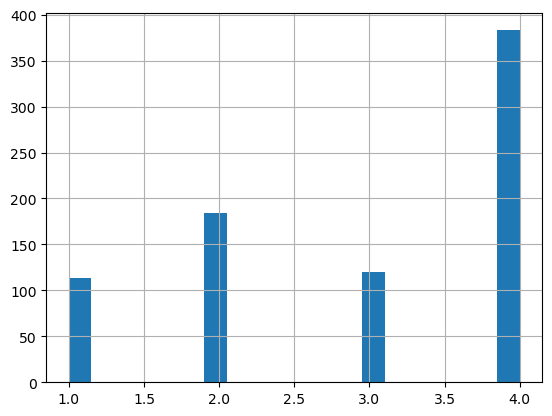

histogram for personal_status


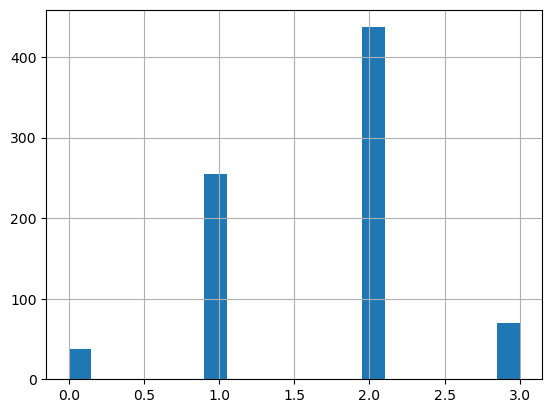

histogram for resident_since


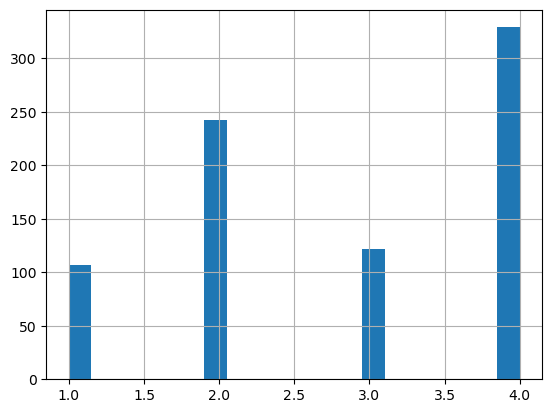

histogram for property_type


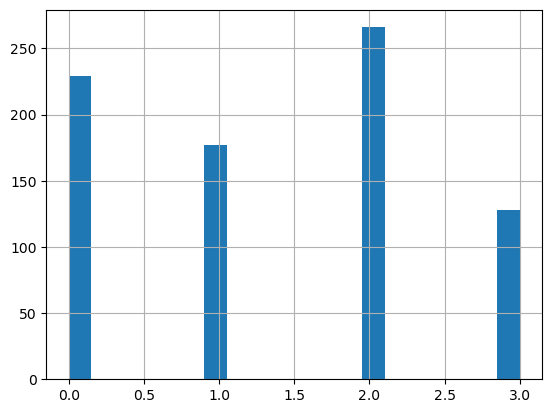

histogram for age


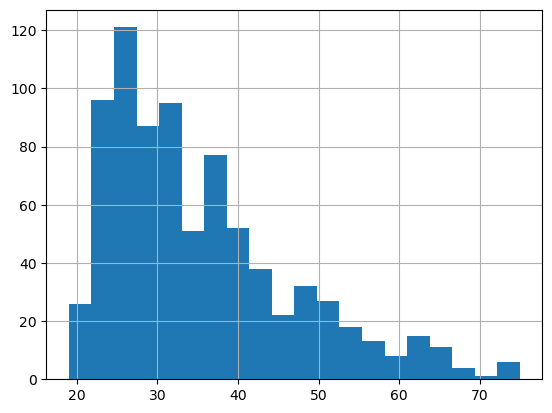

histogram for installment_type


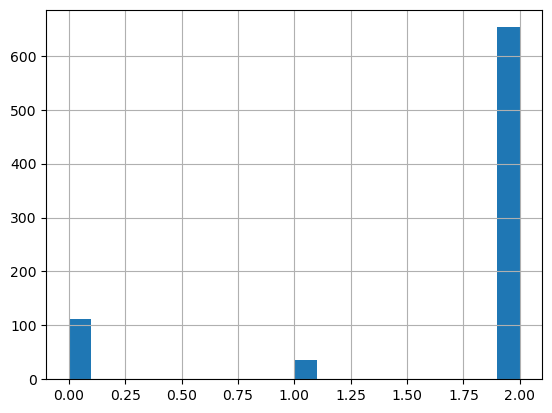

histogram for credits_no


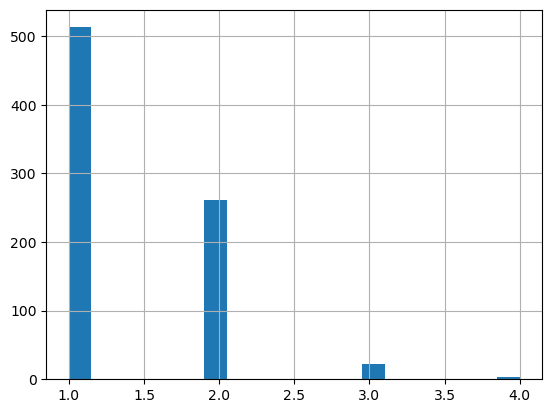

histogram for job_type


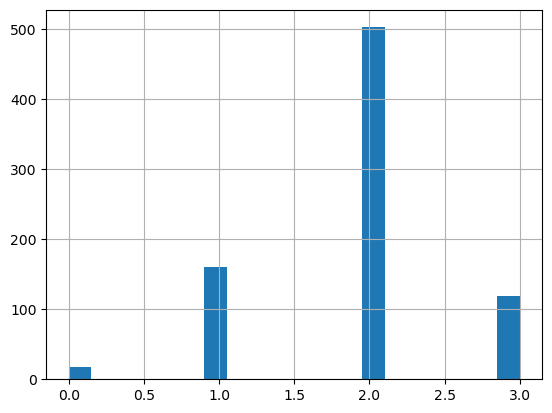

In [81]:
for i in X.columns:
    print('histogram for',i)
    X[i].hist(bins=20)
    plt.show()

histogram for account_info


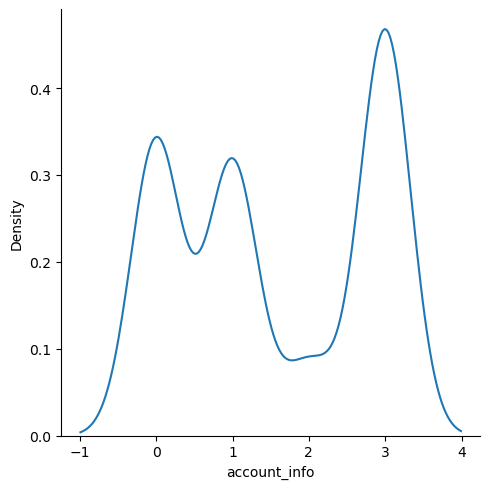

histogram for duration_month


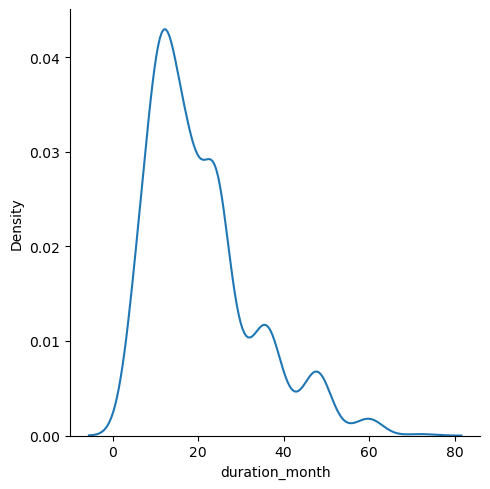

histogram for credit_history


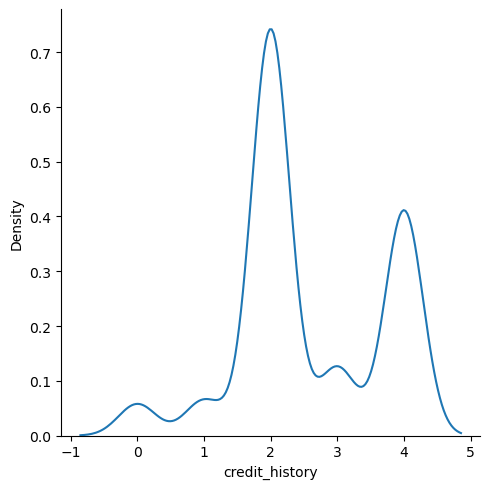

histogram for purpose


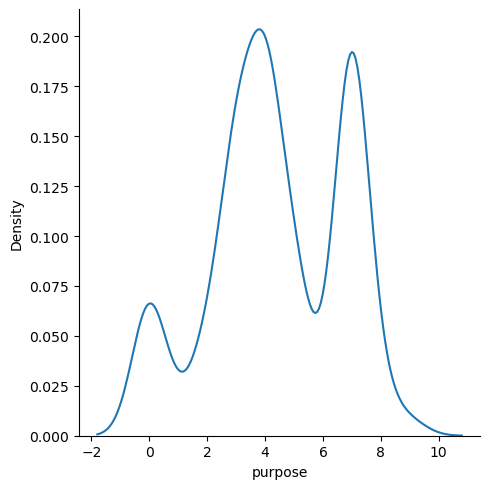

histogram for savings_account


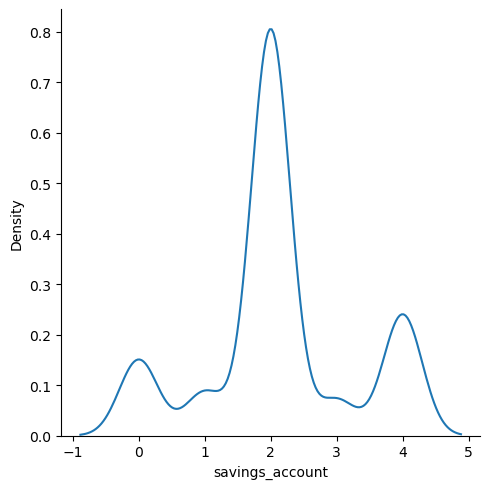

histogram for employment_st


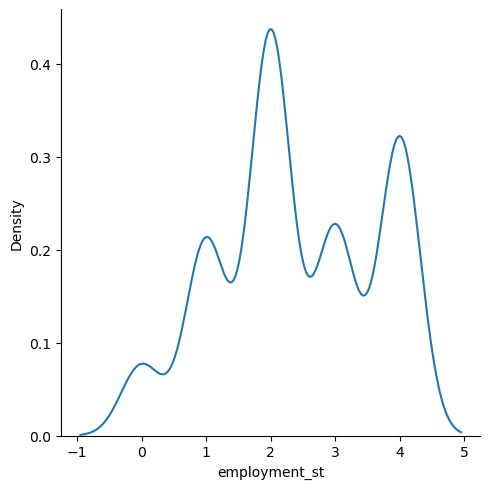

histogram for poi


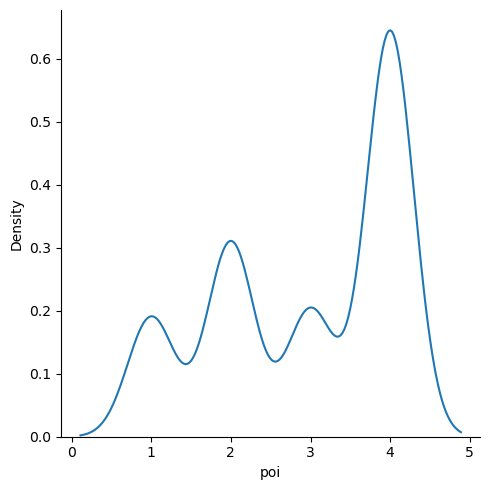

histogram for personal_status


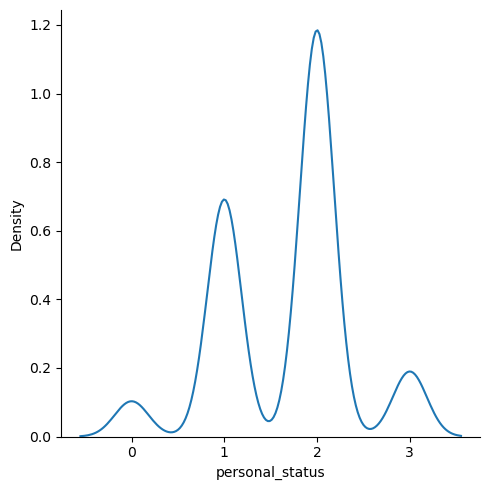

histogram for resident_since


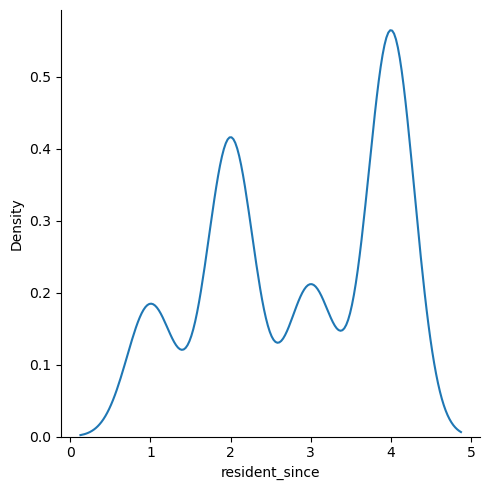

histogram for property_type


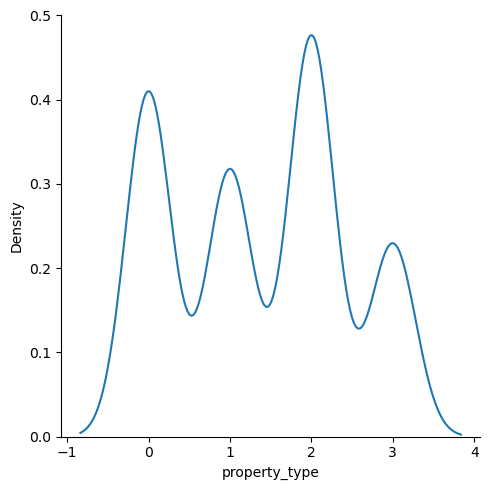

histogram for age


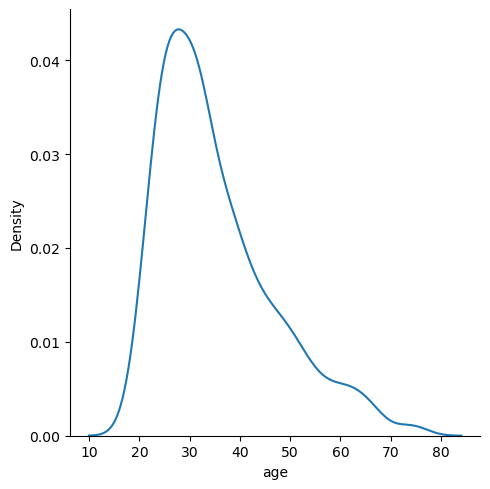

histogram for installment_type


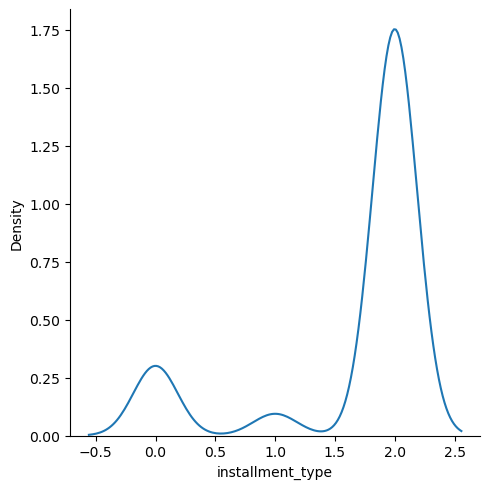

histogram for credits_no


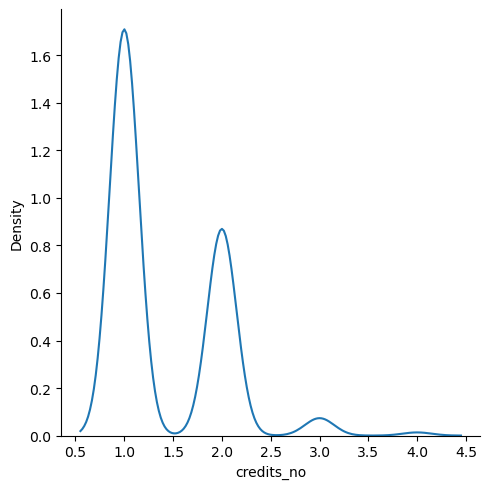

histogram for job_type


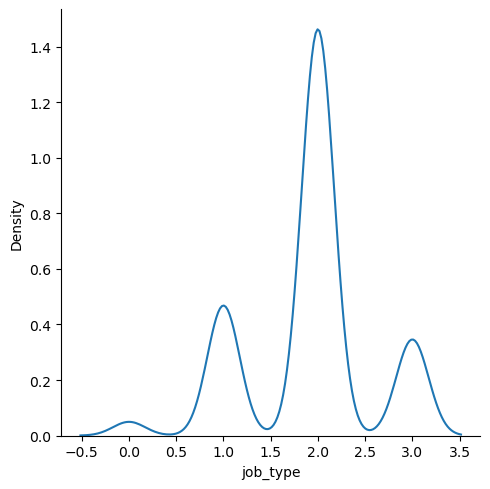

In [82]:
for i in X.columns:
    print('histogram for',i)
    sns.displot(X[i],kind='kde')
    plt.show()

In [83]:
#check skewness for all continous x vars and log tranformation cen be done if skewness exist 
from scipy.stats import skew
#finding the skewness in each variable
data_num_skew = X.apply(lambda i: skew(i.dropna()))
#subsetting the variables that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]
 
print(data_num_skew)
print()
print()
print(data_num_skewed)

account_info        0.019326
duration_month      1.168330
credit_history     -0.025081
purpose            -0.238849
savings_account     0.042525
employment_st      -0.127037
poi                -0.524061
personal_status    -0.283318
resident_since     -0.276732
property_type       0.034760
age                 1.086702
installment_type   -1.830813
credits_no          1.265251
job_type           -0.360549
dtype: float64


duration_month      1.168330
age                 1.086702
installment_type   -1.830813
credits_no          1.265251
dtype: float64


In [84]:
#check for drop vars as per domain knowledge ask mam - tele,liables,credit no,installment type,resident_since,housing_type,
#property_type,gurantors,personal_status 

In [85]:
import numpy as np
# apply log + 1 transformation for all numeric features with skewness over .75
a=['duration_month','age']
for i in a:
    X[i] = np.log1p(X[i])

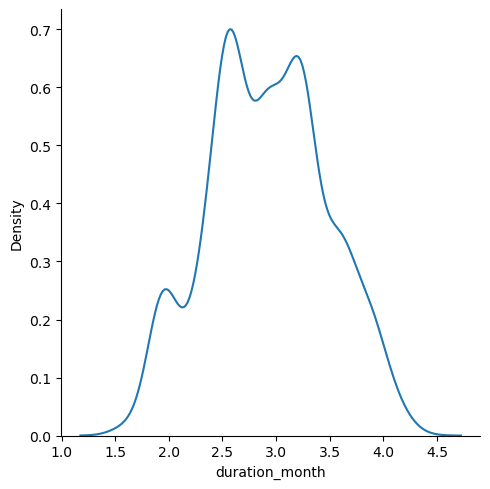

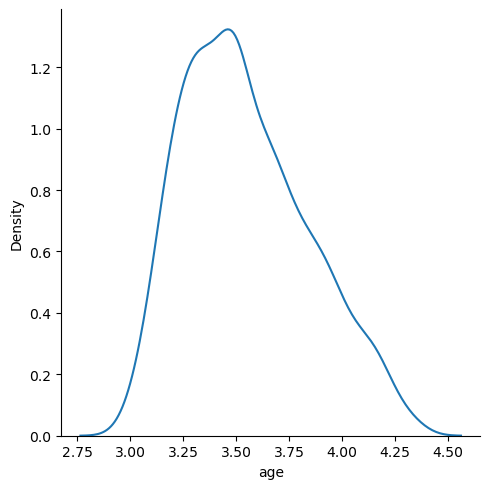

In [86]:
for i in a:
    sns.displot(X[i],kind='kde') #skweness reduced
    plt.show()

In [87]:
#check skewness for all continous x vars and log tranformation cen be done if skewness exist 
from scipy.stats import skew
#finding the skewness in each variable
data_num_skew = X_testing_new.apply(lambda i: skew(i.dropna()))
#subsetting the variables that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]
 
print(data_num_skew)
print()
print()
print(data_num_skewed)

account_info       -0.047792
duration_month      0.906632
credit_history      0.041716
purpose            -0.324218
savings_account     0.183271
employment_st      -0.074807
poi                -0.552284
personal_status    -0.391344
resident_since     -0.251994
property_type       0.085329
age                 0.871310
installment_type   -1.795333
credits_no          1.269161
job_type           -0.425577
dtype: float64


duration_month      0.906632
age                 0.871310
installment_type   -1.795333
credits_no          1.269161
dtype: float64


In [88]:
import numpy as np
# apply log + 1 transformation for all numeric features with skewness over .75
b=['duration_month','age']
for i in b:
    X_testing_new[i] = np.log1p(X_testing_new[i])

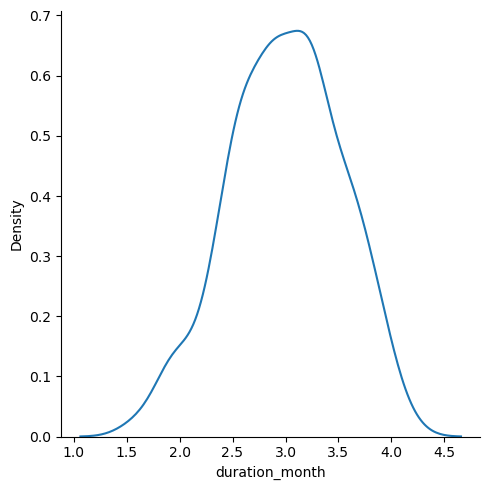

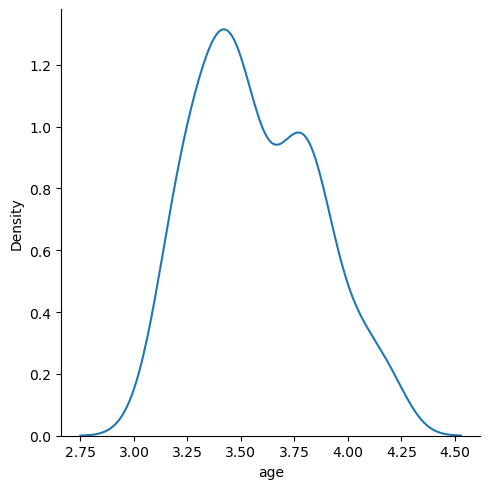

In [89]:
for i in b:
    sns.displot(X_testing_new[i],kind='kde') #skweness reduced
    plt.show()

In [90]:
#Assumption of no multicollinearity: there should be no multicollinearity between the independent variables 
#multicollinearity is the relationship amongst the multiple independent variables
corr_df=X.corr(method='pearson')
print(corr_df)

                  account_info  duration_month  credit_history   purpose  \
account_info          1.000000       -0.084328        0.207977  0.068505   
duration_month       -0.084328        1.000000       -0.070539 -0.063965   
credit_history        0.207977       -0.070539        1.000000  0.043797   
purpose               0.068505       -0.063965        0.043797  1.000000   
savings_account       0.090805        0.022626        0.058521  0.045845   
employment_st         0.133614        0.058407        0.104652  0.042114   
poi                   0.028288        0.133277        0.021242  0.094797   
personal_status       0.020543        0.011564        0.031134  0.137672   
resident_since        0.016401        0.043166        0.041209 -0.038570   
property_type        -0.026622        0.287582       -0.042858 -0.024395   
age                   0.085478       -0.067582        0.164881 -0.000106   
installment_type      0.065145       -0.076506        0.112312  0.089913   
credits_no  

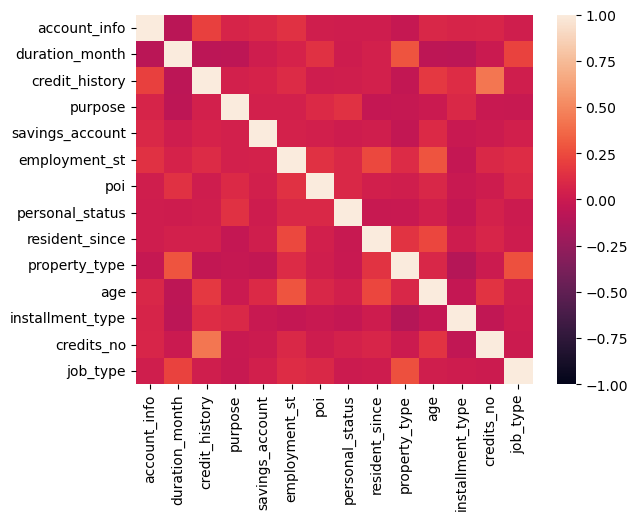

In [91]:
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0)
plt.show()

- There is no collinearity between X ans X variable in data we can check correlation coefficient <-0.75 or >0.75

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
 
vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])] 
#shape is 3 cols i in range 0 to 2 cal vif for i col index and col values now i is dept var and vif is calculated
vif_df.round(2)

,features,VIF Factor
0,account_info,2.73
1,duration_month,27.97
2,credit_history,8.63
3,purpose,4.89
4,savings_account,4.71
5,employment_st,5.79
6,poi,8.37
7,personal_status,6.88
8,resident_since,8.52
9,property_type,3.16


- many variables have multicollinearity like age,duration_month but we do not drop any because of domain importance of these
features

In [93]:
from sklearn.preprocessing import StandardScaler
 
scaler=StandardScaler()
scaler.fit(X)             
X=scaler.transform(X)
print(X)

[[-0.44562623 -1.77356386  1.33983761 ...  0.4583396   1.06029465
   0.14555648]
 [-1.23961507  1.76574832 -0.50503346 ...  0.4583396  -0.69588696
   0.14555648]
 [ 1.14235144 -0.64762646  1.33983761 ...  0.4583396  -0.69588696
  -1.38661701]
 ...
 [ 1.14235144 -0.64762646  1.33983761 ...  0.4583396   1.06029465
  -1.38661701]
 [ 1.14235144  0.54176551  0.41740208 ...  0.4583396   1.06029465
   0.14555648]
 [-1.23961507 -1.12482683 -0.50503346 ...  0.4583396  -0.69588696
  -2.9187905 ]]


In [94]:
#transforming the testing data x to standard scaler previous train data scalar object
X_testing_new=scaler.transform(X_testing_new) #only transform for test file
print(X_testing_new)

[[ 1.14235144  0.54176551  1.33983761 ...  0.4583396   1.06029465
   0.14555648]
 [-1.23961507  0.04260697  1.33983761 ... -2.37310196  1.06029465
  -1.38661701]
 [-0.44562623  0.04260697  1.33983761 ...  0.4583396   1.06029465
   0.14555648]
 ...
 [ 1.14235144 -0.64762646 -0.50503346 ...  0.4583396  -0.69588696
   0.14555648]
 [-0.44562623  1.65083558 -0.50503346 ...  0.4583396  -0.69588696
   0.14555648]
 [-1.23961507  1.65083558  1.33983761 ...  0.4583396  -0.69588696
   0.14555648]]


In [95]:
#train set and validation set split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y_log,test_size=0.2,random_state=10)

In [96]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(640, 14)
(640,)
(160, 14)
(160,)


In [97]:
from sklearn.linear_model import LinearRegression
#create a model object
lm = LinearRegression()
# train the model object
lm.fit(x_train,y_train)

#print intercept and coefficients
print(lm.intercept_) #intercept_ param will give us y-intercept value B0 beta zero
print(lm.coef_) #coef_ param will give us slope coefficients values of each ind vars B1,B2,B3

7.777141685025542
[-0.00656399  0.45068609 -0.00531482 -0.03646382  0.0437575  -0.01970434
 -0.31130737  0.01918972 -0.02133588  0.0978074   0.04501017  0.04479091
  0.02008539  0.12931113]


In [98]:
#pair x column names and its slope coeffs
print(list(zip(data_train.drop('credit_amount',axis=1).columns,lm.coef_)))

[('account_info', -0.006563990371717325), ('duration_month', 0.4506860912203099), ('credit_history', -0.005314818427631853), ('purpose', -0.0364638182172919), ('savings_account', 0.043757499643880246), ('employment_st', -0.019704335790723174), ('poi', -0.311307371914187), ('personal_status', 0.019189724392180522), ('gurantors', -0.021335880934278014), ('resident_since', 0.09780739534742763), ('property_type', 0.045010171805850374), ('age', 0.04479091283669257), ('installment_type', 0.020085391907591496), ('housing_type', 0.12931112886977597)]


In [99]:
s=pd.DataFrame()
 
s["Column"]=data_train.drop(['credit_amount','gurantors','housing_type','liables','telephone','foreigner'],axis=1).columns
s["LM slope coefficient"]=lm.coef_
 
s.sort_values("LM slope coefficient",ascending=False)

,Column,LM slope coefficient
1,duration_month,0.450686
13,job_type,0.129311
9,property_type,0.097807
10,age,0.045010
11,installment_type,0.044791
4,savings_account,0.043757
12,credits_no,0.020085
7,personal_status,0.019190
2,credit_history,-0.005315
0,account_info,-0.006564


In [100]:
#predict all values test model using x_test
y_pred_lm=lm.predict(x_test)
#print(y_pred_lm)

In [101]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(y_test,y_pred_lm)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(y_test,y_pred_lm))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

#with all vars lin Reg model evalution
#R-squared: 0.6784327149057403
#RMSE: 0.4642697960680228
#Adj R-square: 0.673114172022502

#OLS model evalution dropping 5 less significant vars(DTree feature importance) - for lin Reg
#R-squared: 0.6794470065297047
#RMSE: 0.4632820251916127
#Adj R-square: 0.6737301378563492

#Linear Reg dropping 5 less significant vars(DTree feature importance)
#R-squared: 0.6794470065297036
#RMSE: 0.46328202519161343
#Adj R-square: 0.6737301378563479

R-squared: 0.6794470065297036
RMSE: 0.46328202519161343
Adj R-square: 0.6737301378563479


In [102]:
#OLS model is better RMSE lower and R2 increased still very least difference almost same result

In [103]:
Y_log.min()

5.5254529391317835

In [104]:
Y_log.max()

9.67696329306244

In [105]:
np.exp(y_pred_lm) #validation y_pred antilog

array([ 1679.79186528,  3081.92937928,  5722.99906646,  7061.86292761,
        4521.64573773,  1575.26531864,  6193.66730847,  1156.26855536,
        2416.8106829 ,  4669.82949811,  1800.77906547,  1199.4373702 ,
        3662.89361913,  1260.711905  ,  3012.83554634,  2159.40221776,
        2152.31336941,  5082.0547023 ,  2270.79892065,  5856.16440049,
        1266.14884346,  1609.97521195,  6102.96876441,  6901.11867869,
        1065.28415415,  2325.51726673,  1738.68764864,  5264.09210772,
        2014.71598707,  1813.38988816,  3281.02339727,  4794.91757255,
         825.39685714,  2546.89580274,  9997.42723305,  1503.27240539,
        3074.46594919,  1290.08917264,  1657.51484414,  2804.68055691,
        2307.98006994,  2621.7626705 ,  1952.59452856,  2682.9822061 ,
        3256.57281747,   927.7028486 ,  3451.06663858,  4808.48596362,
        5165.28010012,   889.73175645,  2586.90728033,  3880.70858009,
         740.08124069,   983.43808297,  2376.73471088,  1415.99666222,
      

In [106]:
#Actual test y and pred y evaluations taking antilog of y
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(np.exp(y_test),np.exp(y_pred_lm))
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred_lm)))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)


R-squared: 0.6181408382161557
RMSE: 1709.3157860159681
Adj R-square: 0.6113306111270171


In [107]:
#RMSE is low 0.47 which is good
#R2 and Ajusted R2 are closer and good
#can tune the model to improve R2 and reduce RMSE

In [114]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train,y_train)
print(ridge.intercept_)
print(ridge.coef_)

7.777142954820388
[-0.0065945   0.44985404 -0.00529115 -0.03651863  0.04371475 -0.01965296
 -0.31066862  0.01914248 -0.02123046  0.09787312  0.04479356  0.04466913
  0.02004646  0.12920172]


In [115]:
#pair x column names and its slope coeffs
print(list(zip(data_train.drop('credit_amount',axis=1).columns,ridge.coef_)))

[('account_info', -0.006594501127572754), ('duration_month', 0.44985404392615025), ('credit_history', -0.005291153255484091), ('purpose', -0.03651862676078487), ('savings_account', 0.043714745892488666), ('employment_st', -0.019652956291846626), ('poi', -0.3106686176026526), ('personal_status', 0.01914247956564509), ('gurantors', -0.021230456484271954), ('resident_since', 0.09787312275093728), ('property_type', 0.04479355890389206), ('age', 0.044669134499526426), ('installment_type', 0.02004646089302303), ('housing_type', 0.12920171743108425)]


In [116]:
y_pred_ridge=ridge.predict(x_test)

In [117]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(y_test,y_pred_ridge)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(y_test,y_pred_ridge))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

#Linear regression evaluation
#R-squared: 0.6682367785608849
#RMSE: 0.47157266275675735
#Adj R-square: 0.6601553667565987

R-squared: 0.6792537524620557
RMSE: 0.46342165521793915
Adj R-square: 0.6735334372193407


In [118]:
#R2 reduced and RMSE increased so linear regression model is better

In [119]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train,y_train)
print(lasso.intercept_)
print(lasso.coef_)

7.776675857306526
[-0.  0. -0. -0.  0. -0. -0. -0.  0.  0. -0.  0.  0.  0.]


In [120]:
y_pred_lasso=lasso.predict(x_test)

In [121]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(y_test,y_pred_lasso)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(y_test,y_pred_lasso))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: -0.0035194132749702955
RMSE: 0.8197065797663848
Adj R-square: -0.021416574785606768


In [122]:
#Lasso model has converted all beta values for independent vars as 0
#eqn=B0
#thus excluding all vars, we drop lasso model
#data_train.columns
#pd.DataFrame?

In [123]:
y_train

serial number
312    8.614683
470    8.451053
36     8.465268
762    7.661527
236    7.508787
         ...   
370    8.007034
321    8.354674
528    7.315884
126    7.660114
266    6.688355
Name: credit_amount, Length: 640, dtype: float64

In [124]:
new_df=pd.DataFrame(x_train,columns=['account_info', 'duration_month', 'credit_history', 'purpose', 'savings_account', 'employment_st', 'poi',
      'personal_status', 'resident_since', 'property_type',
       'age', 'installment_type', 'credits_no', 'job_type'])
new_df['credit_amount']=y_train.values
new_df.shape

(640, 15)

In [125]:
new_df.head()

,account_info,duration_month,credit_history,purpose,savings_account,employment_st,poi,personal_status,resident_since,property_type,age,installment_type,credits_no,job_type,credit_amount
0,1.142351,0.541766,-0.505033,-0.613522,-1.892353,-0.331308,0.916363,0.466161,-1.664570,0.597609,-0.982812,-0.957381,-0.695887,0.145556,8.614683
1,1.142351,0.541766,0.417402,0.265292,-0.108166,0.502172,0.029918,0.466161,0.143517,0.597609,-0.170092,0.458340,1.060295,-1.386617,8.451053
2,-1.239615,1.650836,1.339838,1.144106,-0.108166,-1.164788,0.916363,0.466161,-0.760527,-0.345364,-0.982812,0.458340,1.060295,-1.386617,8.465268
3,-0.445626,0.042607,1.339838,-0.613522,-0.108166,-0.331308,0.916363,-0.962686,1.047561,-1.288336,-1.116512,0.458340,1.060295,0.145556,7.661527
4,-0.445626,0.541766,-0.505033,1.144106,-0.108166,-1.998268,0.916363,0.466161,-0.760527,0.597609,-0.383218,-0.957381,-0.695887,1.677730,7.508787


In [126]:
import statsmodels.formula.api as sm
 
# create a fitted model with all three features
ols_model = sm.ols(formula='credit_amount ~ account_info + duration_month + credit_history + purpose + savings_account + employment_st +  poi + personal_status + resident_since + property_type + age + installment_type + credits_no + job_type',data=new_df).fit()
 
# print the coefficients
print(ols_model.params)
print(ols_model.summary()) #we get summary based on train set

Intercept           7.777142
account_info       -0.006564
duration_month      0.450686
credit_history     -0.005315
purpose            -0.036464
savings_account     0.043757
employment_st      -0.019704
poi                -0.311307
personal_status     0.019190
resident_since     -0.021336
property_type       0.097807
age                 0.045010
installment_type    0.044791
credits_no          0.020085
job_type            0.129311
dtype: float64
                            OLS Regression Results                            
Dep. Variable:          credit_amount   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     59.89
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          1.69e-105
Time:                        00:27:12   Log-Likelihood:                -461.75
No. Observations:                 640   AIC:                             953

In [127]:
x_test.shape

(160, 14)

In [128]:
x_test

array([[ 0.3483626 , -0.64762646, -1.42746899, ...,  0.4583396 ,
         1.06029465,  0.14555648],
       [-0.44562623,  0.54176551, -2.34990452, ..., -2.37310196,
         1.06029465,  0.14555648],
       [-1.23961507,  0.54176551,  0.41740208, ...,  0.4583396 ,
        -0.69588696,  0.14555648],
       ...,
       [-0.44562623, -0.64762646, -1.42746899, ..., -2.37310196,
        -0.69588696, -1.38661701],
       [ 1.14235144,  1.25482995, -0.50503346, ...,  0.4583396 ,
        -0.69588696,  0.14555648],
       [ 1.14235144,  0.93302012,  1.33983761, ...,  0.4583396 ,
         1.06029465,  0.14555648]])

In [129]:
new_df_val=pd.DataFrame(x_test,columns=['account_info', 'duration_month', 'credit_history', 'purpose', 'savings_account', 'employment_st', 'poi',
      'personal_status', 'resident_since', 'property_type',
       'age', 'installment_type', 'credits_no', 'job_type'])
#new_df['credit_amount']=y_test.values
new_df_val.shape

(160, 14)

In [130]:
y_test.shape

(160,)

In [131]:
y_test

serial number
28     6.016157
335    8.321422
731    8.764678
393    8.086410
496    8.005367
         ...   
565    8.458080
589    7.104965
158    5.828946
371    8.032685
717    8.032035
Name: credit_amount, Length: 160, dtype: float64

In [132]:
y_pred_ols=ols_model.predict(new_df_val)

In [133]:
print(y_pred_ols)

0      7.426425
1      8.033311
2      8.652248
3      8.862464
4      8.416631
         ...   
155    8.029597
156    7.357271
157    6.979752
158    8.034666
159    8.348930
Length: 160, dtype: float64


In [134]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(y_test,y_pred_ols)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(y_test,y_pred_ols))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.6794470065297047
RMSE: 0.4632820251916127
Adj R-square: 0.6737301378563492


In [140]:
#OLS model is better RMSE lower and R2 increased still very least difference almost same result

In [141]:
#OLS Result dropping 5 less significant vars(DTree feature importance)
#R-squared: 0.6794470065297047
#RMSE: 0.4632820251916127
#Adj R-square: 0.6737301378563492

#Linear Reg REsult dropping 5 less significant vars(DTree feature importance)
#R-squared: 0.6794470065297036
#RMSE: 0.46328202519161343
#Adj R-square: 0.6737301378563479

In [142]:
#Test.csv predictions using Lin Reg model
y_pred_lm_test_data=lm.predict(X_testing_new) #test data
y_pred_lm_test_data

array([7.99740628, 7.33714065, 8.2618591 , 7.30206539, 7.60835888,
       8.68468083, 6.65192365, 7.28115593, 9.39517715, 7.48429089,
       7.18750625, 6.50321879, 8.0843469 , 8.7665896 , 8.49425376,
       8.68345298, 7.45546488, 7.5160528 , 8.8933561 , 7.24415881,
       7.43364632, 7.54187631, 8.52554036, 6.64260428, 8.10625475,
       7.61732759, 8.10923675, 8.21341562, 8.58880333, 8.62451862,
       7.94372186, 7.54702106, 8.92600936, 8.38003217, 7.53448053,
       7.2554228 , 7.24503794, 6.90356605, 7.79855618, 7.66319496,
       8.06524544, 7.44022644, 7.26875988, 7.79467049, 7.46932913,
       8.25502656, 8.3556002 , 7.68026546, 7.18018096, 6.83612805,
       7.46458333, 8.10109333, 7.51927779, 7.50544613, 8.76247623,
       7.60731147, 7.04363061, 7.55349492, 7.62698141, 7.62414854,
       7.67952062, 7.68252505, 7.5823823 , 7.58455889, 7.18967334,
       7.8684277 , 7.49777155, 7.67634579, 8.51203885, 7.09744074,
       8.67223406, 7.4541509 , 7.65023438, 7.38224731, 7.57804

In [143]:
#credit amount predictions from linear model
y_pred_lm_test_data= np.exp(y_pred_lm_test_data) #exponential,antilog of Y
y_pred_lm_test_data

array([ 2973.23624877,  1536.31297168,  3873.28825616,  1483.36047945,
        2014.96858119,  5911.65338631,   774.27232311,  1452.66624076,
       12030.22064046,  1779.86161339,  1322.80034999,   667.28603629,
        3243.30092905,  6416.25309529,  4886.60837583,  5904.39917596,
        1729.28772418,  1837.30076587,  7283.42209608,  1399.90380987,
        1691.965792  ,  1885.36423072,  5041.91051115,   767.09010854,
        3315.13871539,  2033.12153151,  3325.03923894,  3690.12502938,
        5371.1823023 ,  5566.48248803,  2817.82857348,  1895.08896727,
        7525.17513641,  4359.14913932,  1871.4719336 ,  1415.76145614,
        1401.13505759,   995.81953549,  2437.08073089,  2128.54719284,
        3181.93709752,  1703.1358429 ,  1434.77006154,  2427.62936614,
        1753.4299693 ,  3846.91403604,  4253.93705985,  2165.19445762,
        1313.14586679,   930.87783812,  1745.12824749,  3298.07199225,
        1843.23560985,  1817.9161173 ,  6389.91488111,  2012.85917862,
      

In [144]:
df_x_test=pd.DataFrame(X_testing_new,columns=['account_info', 'duration_month', 'credit_history', 'purpose',
      'savings_account', 'employment_st', 'poi',
       'personal_status', 'resident_since', 'property_type',
       'age', 'installment_type', 'credits_no', 'job_type'])

#Test.csv predictions using OLS model linear Reg
y_pred_ols_test_data= ols_model.predict(df_x_test) #test data
y_pred_ols_test_data

0      7.997406
1      7.337141
2      8.261859
3      7.302065
4      7.608359
         ...   
195    7.126918
196    8.057229
197    7.210807
198    8.307697
199    8.497303
Length: 200, dtype: float64

In [145]:
#credit amount predictions from OLS model
y_pred_ols_test_data= np.exp(y_pred_ols_test_data) #exponential,antilog of Y
y_pred_ols_test_data

0      2973.236249
1      1536.312972
2      3873.288256
3      1483.360479
4      2014.968581
          ...     
195    1245.033693
196    3156.532400
197    1353.984170
198    4054.963778
199    4901.531227
Length: 200, dtype: float64

## DecisionTreeRegressor Model

In [146]:
X=data_train.drop(['credit_amount','gurantors','housing_type','liables','telephone','foreigner'],axis=1).values
Y=data_train.credit_amount.values

In [147]:
X_test_tree=data_test.drop(['gurantors','housing_type','liables','telephone','foreigner'],axis=1).values

In [148]:
X #train file X

array([[ 1.,  6.,  4., ...,  2.,  2.,  2.],
       [ 0., 48.,  2., ...,  2.,  1.,  2.],
       [ 3., 12.,  4., ...,  2.,  1.,  1.],
       ...,
       [ 3., 12.,  4., ...,  2.,  2.,  1.],
       [ 3., 24.,  3., ...,  2.,  2.,  2.],
       [ 0.,  9.,  2., ...,  2.,  1.,  0.]])

In [149]:
X.shape

(800, 14)

In [150]:
Y #train file Y

array([ 1169,  5951,  2096,  7882,  4870,  9055,  2835,  6948,  3059,
        5234,  1295,  4308,  1567,  1199,  1403,  1282,  2424,  8072,
       12579,  3430,  2134,  2647,  2241,  1804,  2069,  1374,   426,
         409,  2415,  6836,  1913,  4020,  5866,  1264,  1474,  4746,
        6110,  2100,  1225,   458,  2333,  1158,  6204,  6187,  6143,
        1393,  2299,  1352,  7228,  2073,  2333,  5965,  1262,  3378,
        2225,   783,  6468,  9566,  1961,  6229,  1391,  1537,  1953,
       14421,  3181,  5190,  2171,  1007,  1819,  2394,  8133,   730,
        1164,  5954,  1977,  1526,  3965,  4771,  9436,  3832,  5943,
        1213,  1568,  1755,  2315,  1412,  1295, 12612,  2249,  1108,
         618,  1409,   797,  3617,  1318, 15945,  2012,  2622,  2337,
        7057,  1469,  2323,   932,  1919,  2445, 11938,  6458,  6078,
        7721,  1410,  1449,   392,  6260,  7855,  1680,  3578,  7174,
        2132,  4281,  2366,  1835,  3868,  1768,   781,  1924,  2121,
         701,   639,

In [151]:
Y.shape

(800,)

In [152]:
from sklearn.preprocessing import StandardScaler
 
scaler=StandardScaler()
scaler.fit(X)             
X=scaler.transform(X)
print(X)

[[-0.44562623 -1.19692714  1.33983761 ...  0.4583396   1.06029465
   0.14555648]
 [-1.23961507  2.25752672 -0.50503346 ...  0.4583396  -0.69588696
   0.14555648]
 [ 1.14235144 -0.70343373  1.33983761 ...  0.4583396  -0.69588696
  -1.38661701]
 ...
 [ 1.14235144 -0.70343373  1.33983761 ...  0.4583396   1.06029465
  -1.38661701]
 [ 1.14235144  0.28355309  0.41740208 ...  0.4583396   1.06029465
   0.14555648]
 [-1.23961507 -0.95018043 -0.50503346 ...  0.4583396  -0.69588696
  -2.9187905 ]]


In [153]:
X_test_tree=scaler.transform(X_test_tree)
print(X_test_tree)

[[ 1.14235144  0.28355309  1.33983761 ...  0.4583396   1.06029465
   0.14555648]
 [-1.23961507 -0.20994032  1.33983761 ... -2.37310196  1.06029465
  -1.38661701]
 [-0.44562623 -0.20994032  1.33983761 ...  0.4583396   1.06029465
   0.14555648]
 ...
 [ 1.14235144 -0.70343373 -0.50503346 ...  0.4583396  -0.69588696
   0.14555648]
 [-0.44562623  2.01078001 -0.50503346 ...  0.4583396  -0.69588696
   0.14555648]
 [-1.23961507  2.01078001  1.33983761 ...  0.4583396  -0.69588696
   0.14555648]]


In [154]:
#train set and validation set split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(640, 14)
(640,)
(160, 14)
(160,)


In [155]:
#using DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
#create a model object
model_DecisionTree = DecisionTreeRegressor(random_state=10,criterion='squared_error',max_depth=6,min_samples_leaf=5) 
# train the model object
model_DecisionTree.fit(x_train,y_train) #trainig phase is building the DTree fit Tree

y_pred=model_DecisionTree.predict(x_test)
#print(y_pred)

In [156]:
model_DecisionTree.score(x_train,y_train) #training score R2 

0.6655310919897153

In [157]:
#validation set score
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(y_test,y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.5738499504625945
RMSE: 1805.7264836289035
Adj R-square: 0.5662498221905898


In [158]:
#we have pruned the DTree and the R2 score has and RMSE has reduced as compare to base model
#R-squared: 0.5738499504625945
#RMSE: 1805.7264836289035
#Adj R-square: 0.5634693723328372

In [159]:
#list of importance features by Decision Tree Regressor for predicting credit amount
sample=pd.DataFrame()
 
sample["Column"]=data_train.drop(['credit_amount','gurantors','housing_type','liables','telephone','foreigner'],axis=1).columns
sample["Imp value"]=model_DecisionTree.feature_importances_
 
sample.sort_values("Imp value",ascending=False)

,Column,Imp value
1,duration_month,0.655826
6,poi,0.103850
13,job_type,0.093433
3,purpose,0.039777
9,property_type,0.032120
0,account_info,0.024819
4,savings_account,0.010548
8,resident_since,0.009570
5,employment_st,0.008991
2,credit_history,0.007378


In [160]:
#range of Y
Y.min()

250

In [161]:
Y.max()

15945

In [162]:
#lets apply other alforithms then prune the tree

In [163]:
from sklearn.ensemble import RandomForestRegressor
#create a model object
model_RandomForest = RandomForestRegressor(random_state=10,n_estimators=500,bootstrap=True,n_jobs=-1,max_depth=7,min_samples_leaf=4) 
# train the model object
model_RandomForest.fit(x_train,y_train) #trainig phase is building the DTree Trees 500

y_pred_forest=model_RandomForest.predict(x_test)
#print(y_pred_forest)

In [164]:
model_RandomForest.score(x_train,y_train) #training score

0.732847737868974

In [165]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(y_test,y_pred_forest)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(y_test,y_pred_forest))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

#base model Random Forest all vars pruned tree is better than subset cols RF prunned n_estimators=100,
#,max_depth=6,min_samples_leaf=5

#R-squared: 0.6565458253479772
#RMSE: 1621.082419041153
#Adj R-square: 0.6481796339141459

#Random Forest pruned with subset of vars 14 vars and param n_estimators=100,max_depth=6
#min_samples_leaf=5
#R-squared: 0.653436832244169
#RMSE: 1628.4030169919417
#Adj R-square: 0.6472560878510714

#n_estimators=150,rest same
#R-squared: 0.6615506069550134
#RMSE: 1609.2279454859229
#Adj R-square: 0.6555145668242748

#n_estimators=200,rest same
#R-squared: 0.6630080500905895
#RMSE: 1605.7593492365272
#Adj R-square: 0.6569980025762816

##n_estimators=500,rest same
#R-squared: 0.6635317694928107
#RMSE: 1604.5111082654587
#Adj R-square: 0.6575310621971411

##n_estimators=500,dept=6,min sample leaf=4
#R-squared: 0.667797702100121
#RMSE: 1594.3072173553273
#Adj R-square: 0.661873075131206

#n_estimators=500,dept=7,min sample leaf=4, bootstrap=True
#R-squared: 0.6682443161906275
#RMSE: 1593.2351604328592
#Adj R-square: 0.6623276543137724

R-squared: 0.6682443161906275
RMSE: 1593.2351604328592
Adj R-square: 0.6623276543137724


- Least RMSE in Random forest model 1593.2351604328592

In [166]:
#list of importance features by Random forest Regressor for predicting credit amount
sample1=pd.DataFrame()
 
sample1["Column"]=data_train.drop(['credit_amount','gurantors','housing_type','liables','telephone','foreigner'],axis=1).columns
sample1["Imp value"]=model_RandomForest.feature_importances_
 
sample1.sort_values("Imp value",ascending=False)

,Column,Imp value
1,duration_month,0.546248
6,poi,0.119473
13,job_type,0.089329
9,property_type,0.042653
0,account_info,0.037134
10,age,0.034630
4,savings_account,0.029332
3,purpose,0.027253
8,resident_since,0.017993
5,employment_st,0.017815


In [167]:
y_pred_RF_testing=model_RandomForest.predict(X_test_tree)
y_pred_RF_testing

array([2873.75073185, 3148.13309711, 3308.86573553, 1310.81582184,
       4221.48461073, 6642.79810841, 1577.532219  , 1234.07288184,
       9370.07914485, 2416.82257713, 1703.52752284, 1502.48019724,
       4594.20672421, 6134.86509632, 5855.69318249, 6245.37064835,
       2187.50616052, 1958.07965058, 6794.5816934 , 1809.60037517,
       1848.15990485, 1890.81394484, 5611.34567088,  874.71716853,
       3602.03935781, 1673.09635689, 2940.84072171, 3473.68284038,
       5062.14550986, 6088.44379134, 2703.66132094, 1877.77367684,
       8776.65064583, 5132.2337487 , 2211.38056384, 1988.79180701,
       1335.45942612, 2010.52395383, 1902.42825421, 1731.4632658 ,
       3626.61867183, 2860.01618851, 1815.78079131, 2833.52223011,
       2094.88034366, 5144.90805132, 4760.31333782, 1756.49472635,
       1896.60957   , 1126.03901207, 1656.5811937 , 4424.77304745,
       1468.72187347, 1892.09532116, 6834.33901253, 1727.41999849,
       1311.64144065, 1519.5637216 , 2265.48535951, 2013.89802

In [168]:
from sklearn.ensemble import ExtraTreesRegressor
#create a model object
model_EXT = ExtraTreesRegressor(random_state=10,n_estimators=500,bootstrap=True,n_jobs=-1,max_depth=7,min_samples_leaf=4) #,max_depth=5,min_samples_leaf=5
# train the model object
model_EXT.fit(x_train,y_train) #trainig phase is building the DTree Trees 300

y_pred_EXT=model_EXT.predict(x_test)
#print(y_pred_EXT)

In [169]:
model_EXT.score(x_train,y_train)

0.6810303921880165

In [170]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(y_test,y_pred_EXT)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(y_test,y_pred_EXT))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)
 
#Base model of Extra trees with all vars prunned
#R-squared: 0.637819227084297
#RMSE: 1664.6900802967114
#Adj R-square: 0.6289968749235297

#result is better in 14 vars pruned Extra Trees Regressor
#R-squared: 0.6446542797231598
#RMSE: 1648.9072997656622
#Adj R-square: 0.6383169038201333

R-squared: 0.6623502865760688
RMSE: 1607.325699738868
Adj R-square: 0.6563285082474891


- Random Forest giving better performance in Trees model lower RMSE

In [171]:
#list of importance features by Random forest Regressor for predicting credit amount
sample2=pd.DataFrame()
 
sample2["Column"]=data_train.drop(['credit_amount','gurantors','housing_type','liables','telephone','foreigner'],axis=1).columns
sample2["Imp value"]=model_EXT.feature_importances_
 
sample2.sort_values("Imp value",ascending=False)

,Column,Imp value
1,duration_month,0.526738
6,poi,0.137285
13,job_type,0.092474
9,property_type,0.064806
0,account_info,0.034317
4,savings_account,0.025102
3,purpose,0.020223
2,credit_history,0.019052
8,resident_since,0.018612
12,credits_no,0.018123


## Lets tune the Tree with best hyper-parameters using GridSearchCV

In [172]:
from sklearn.tree import DecisionTreeRegressor
 
model_DecisionTree1 = DecisionTreeRegressor(random_state=10,criterion='squared_error') #fixed parameters should be passsed here
 
#parameters for trial and error should be passed here
parameter_space = {
        'max_depth':[3,4,5,6,7,8],
        'min_samples_split':[150,120,100,80,60,50,40,30,20],
        'max_leaf_nodes':np.arange(3,15)
    }
from sklearn.model_selection import GridSearchCV #RandomizedSearchCV
clf = GridSearchCV(model_DecisionTree1, parameter_space, n_jobs=-1, cv=10) #cv=5 means 5 fold cv

In [173]:
clf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=10), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_leaf_nodes': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': [150, 120, 100, 80, 60, 50, 40,
                                               30, 20]})

In [174]:
print('best parameters found:\n',clf.best_params_) 

best parameters found:
 {'max_depth': 4, 'max_leaf_nodes': 10, 'min_samples_split': 80}


In [175]:
clf.best_score_  #cv accuracy list avg score - cv score

0.3761273462127206

In [176]:
clf.score(x_train,y_train)

0.49336201586258155

In [177]:
y_pred_clf=clf.predict(x_test)

In [178]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(y_test,y_pred_clf)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(y_test,y_pred_clf))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

#all vars result for DTree Grid search
#R-squared: 0.6018084076852792
#RMSE: 1745.4874834757331
#Adj R-square: 0.5921088688981258

#subset of 14 vars result for DTree Grid search is better improved Adj R-square to: 0.5947069015803033

R-squared: 0.6018084076852792
RMSE: 1745.4874834757331
Adj R-square: 0.5947069015803033


In [179]:
'''
from sklearn.ensemble import RandomForestRegressor
 
model_RandomForest1=RandomForestRegressor( random_state=10, bootstrap=True) #fixed parameters should be passsed here
 
#parameters for trial and error should be passed here
parameter_space = {
    'n_estimators':[100,130,150], #200,300],       #np.arange(100, 1001,50), 
    'max_depth':[4,5,6,7,8,10],
    'min_samples_split':[150,120,100,80,60,50,40,30,20],
    'max_leaf_nodes':np.arange(3,15)
    } #'min_samples_leaf':[1,3,4,5,6,7]
from sklearn.model_selection import GridSearchCV #RandomizedSearchCV
clf_RF = GridSearchCV(model_RandomForest1, parameter_space, n_jobs=-1, cv=10) #cv=5 means 5 fold cv
'''

"\nfrom sklearn.ensemble import RandomForestRegressor\n \nmodel_RandomForest1=RandomForestRegressor( random_state=10, bootstrap=True) #fixed parameters should be passsed here\n \n#parameters for trial and error should be passed here\nparameter_space = {\n    'n_estimators':[100,130,150], #200,300],       #np.arange(100, 1001,50), \n    'max_depth':[4,5,6,7,8,10],\n    'min_samples_split':[150,120,100,80,60,50,40,30,20],\n    'max_leaf_nodes':np.arange(3,15)\n    } #'min_samples_leaf':[1,3,4,5,6,7]\nfrom sklearn.model_selection import GridSearchCV #RandomizedSearchCV\nclf_RF = GridSearchCV(model_RandomForest1, parameter_space, n_jobs=-1, cv=10) #cv=5 means 5 fold cv\n"

In [180]:
#clf_RF.fit(x_train,y_train)

In [181]:
#print('best parameters found:\n',clf_RF.best_params_) 

In [182]:
#clf_RF.best_score_ 

In [183]:
#clf_RF.score(x_train,y_train)

In [184]:
#y_pred_clf_RF=clf_RF.predict(x_test)

In [185]:
'''
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(y_test,y_pred_clf_RF)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(y_test,y_pred_clf_RF))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)
'''

'\nfrom sklearn.metrics import r2_score,mean_squared_error\nimport numpy as np\n \nr2=r2_score(y_test,y_pred_clf_RF)\nprint("R-squared:",r2)\n \nrmse=np.sqrt(mean_squared_error(y_test,y_pred_clf_RF))\nprint("RMSE:",rmse)\n \nadjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)\nprint("Adj R-square:",adjusted_r_squared)\n'

In [186]:
'''
from sklearn.ensemble import ExtraTreesRegressor
 
model_EXT1=ExtraTreesRegressor( random_state=10, bootstrap=True) #fixed parameters should be passsed here
 
#parameters for trial and error should be passed here
parameter_space = {
    'n_estimators':[100,130,150],  #200,300],       #np.arange(100, 1001,50), 
    'max_depth':[4,5,6,7,8,10],
    'min_samples_split':[150,120,100,80,60,50,40,30,20],
    'max_leaf_nodes':np.arange(3,15)
    } #'min_samples_leaf':[1,3,4,5,6,7]
from sklearn.model_selection import GridSearchCV #RandomizedSearchCV
clf_EXT = GridSearchCV(model_EXT1, parameter_space, n_jobs=-1, cv=10) #cv=5 means 5 fold cv
'''

"\nfrom sklearn.ensemble import ExtraTreesRegressor\n \nmodel_EXT1=ExtraTreesRegressor( random_state=10, bootstrap=True) #fixed parameters should be passsed here\n \n#parameters for trial and error should be passed here\nparameter_space = {\n    'n_estimators':[100,130,150],  #200,300],       #np.arange(100, 1001,50), \n    'max_depth':[4,5,6,7,8,10],\n    'min_samples_split':[150,120,100,80,60,50,40,30,20],\n    'max_leaf_nodes':np.arange(3,15)\n    } #'min_samples_leaf':[1,3,4,5,6,7]\nfrom sklearn.model_selection import GridSearchCV #RandomizedSearchCV\nclf_EXT = GridSearchCV(model_EXT1, parameter_space, n_jobs=-1, cv=10) #cv=5 means 5 fold cv\n"

In [187]:
#clf_EXT.fit(x_train,y_train)

In [188]:
#print('best parameters found:\n',clf_EXT.best_params_) 

In [189]:
#clf_EXT.best_score_ 

In [190]:
#clf_EXT.score(x_train,y_train)

In [191]:
#y_pred_clf_EXT=clf_EXT.predict(x_test)

In [192]:
'''
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(y_test,y_pred_clf_EXT)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(y_test,y_pred_clf_EXT))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)
'''

'\nfrom sklearn.metrics import r2_score,mean_squared_error\nimport numpy as np\n \nr2=r2_score(y_test,y_pred_clf_EXT)\nprint("R-squared:",r2)\n \nrmse=np.sqrt(mean_squared_error(y_test,y_pred_clf_EXT))\nprint("RMSE:",rmse)\n \nadjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)\nprint("Adj R-square:",adjusted_r_squared)\n'

In [193]:
y_pred_ols_test_data

0      2973.236249
1      1536.312972
2      3873.288256
3      1483.360479
4      2014.968581
          ...     
195    1245.033693
196    3156.532400
197    1353.984170
198    4054.963778
199    4901.531227
Length: 200, dtype: float64

In [194]:
y_pred_ols_test_data.shape

(200,)

In [195]:
data_test.head()

,account_info,duration_month,credit_history,purpose,savings_account,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
serial number,,,,,,,,,,,,,,,,,,,
1,3,24.0,4,2,2,4,4,2,0,4.0,3,54.0,2,2,2,2,2,0,0
2,0,18.0,4,7,2,4,3,1,2,4.0,0,48.0,0,0,2,1,1,1,0
3,1,18.0,4,3,2,4,1,1,0,4.0,1,24.0,2,1,2,2,1,0,0
4,3,12.0,4,7,4,4,4,2,0,4.0,2,35.0,2,1,2,2,1,0,0
5,0,12.0,2,4,4,0,1,1,0,2.0,0,24.0,2,0,1,0,1,0,0


In [196]:
data_test.shape

(200, 19)

In [197]:
data_test.index

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       191, 192, 193, 194, 195, 196, 197, 198, 199, 200],
      dtype='int64', name='serial number', length=200)

## Creating dataframe of y_pred values and storing in csv file

In [198]:
result_df=pd.DataFrame(data_test.index,columns=['serial number'])
result_df['Predicted Credit Amount']=y_pred_ols_test_data
result_df['Predicted Credit Amount Round to Integer']=y_pred_ols_test_data.round(0)
result_df

,serial number,Predicted Credit Amount,Predicted Credit Amount Round to Integer
0,1,2973.236249,2973.0
1,2,1536.312972,1536.0
2,3,3873.288256,3873.0
3,4,1483.360479,1483.0
4,5,2014.968581,2015.0
...,...,...,...
195,196,1245.033693,1245.0
196,197,3156.532400,3157.0
197,198,1353.984170,1354.0
198,199,4054.963778,4055.0


In [199]:
result_df.to_csv('Customers_Credit_Amount_Predictions_OLS_model.csv',index=False,header=True)

In [200]:
result_df_1=pd.DataFrame(data_test.index,columns=['serial number'])
result_df_1['Predicted Credit Amount']=y_pred_lm_test_data
result_df_1['Predicted Credit Amount Round to Integer']=y_pred_lm_test_data.round(0)
result_df_1

,serial number,Predicted Credit Amount,Predicted Credit Amount Round to Integer
0,1,2973.236249,2973.0
1,2,1536.312972,1536.0
2,3,3873.288256,3873.0
3,4,1483.360479,1483.0
4,5,2014.968581,2015.0
...,...,...,...
195,196,1245.033693,1245.0
196,197,3156.532400,3157.0
197,198,1353.984170,1354.0
198,199,4054.963778,4055.0


In [201]:
result_df_1.to_csv('Customers_Credit_Amount_Predictions_LM.csv',index=False,header=True)

In [202]:
result_df_2=pd.DataFrame(data_test.index,columns=['serial number'])
result_df_2['Predicted Credit Amount']=y_pred_RF_testing
result_df_2['Predicted Credit Amount Round to Integer']=y_pred_RF_testing.round(0)
result_df_2

,serial number,Predicted Credit Amount,Predicted Credit Amount Round to Integer
0,1,2873.750732,2874.0
1,2,3148.133097,3148.0
2,3,3308.865736,3309.0
3,4,1310.815822,1311.0
4,5,4221.484611,4221.0
...,...,...,...
195,196,2037.974971,2038.0
196,197,4632.711038,4633.0
197,198,1264.440087,1264.0
198,199,5236.081888,5236.0


In [203]:
result_df_2.to_csv('Customers_Credit_Amount_Predictions_RFmodel.csv',index=False,header=True)

## evaluation metrics for all models applied

- OLS model evalution dropping 5 less significant vars(DTree feature importance) - for lin Reg
- R-squared: 0.6181408382161597
- RMSE: 1709.3157860159592
- Adj R-square: 0.6113306111270211

- Linear Reg dropping 5 less significant vars(DTree feature importance)
- R-squared: 0.6181408382161557
- RMSE: 1709.3157860159681
- Adj R-square: 0.6113306111270171

- Random Forest with 14 vars independent hyper params : n_estimators=500,dept=7,min sample leaf=4, bootstrap=True
- R-squared: 0.6682443161906275
- RMSE: 1593.2351604328592
- Adj R-square: 0.6623276543137724

## Selection of best model
- both OLS model and linear regression are giving less RMSE
- Random forest prunned tree with 14 features is  having least RMSE value and good R2,Adj R2
- I choose Random forest model as best
- i have saved predictions with lin model, ols and Random forest in csv files